# Logistic Regression - Holdouts

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [1]:
# Load Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import ds_functions as ds

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
def holdout_model(X, y, penalty, C, max_iters, n_holdouts=1000):
    # Compute the Average metrics and CNFMTX for a set of hyper-parameters

    acc = [0, 0]
    recall = [0, 0]
    specificity = [0, 0]
    precision = [0, 0]
    matrices = np.zeros((2, 2, n_holdouts))

    for h in range(n_holdouts):
        trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

        logreg = LogisticRegression(penalty=penalty, C=C, max_iter=max_iters)
        logreg.fit(trnX, trnY)

        prd_trn = logreg.predict(trnX)
        prd_tst = logreg.predict(tstX)

        cnf_mtx_trn = metrics.confusion_matrix(trnY, prd_trn, labels)
        tn_trn, fp_trn, fn_trn, tp_trn = cnf_mtx_trn.ravel()
        cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
        matrices[:,:,h] = cnf_mtx_tst
        tn_tst, fp_tst, fn_tst, tp_tst = cnf_mtx_tst.ravel()

        acc[0] += (tn_trn + tp_trn) / (tn_trn + tp_trn + fp_trn + fn_trn)
        acc[1] += (tn_tst + tp_tst) / (tn_tst + tp_tst + fp_tst + fn_tst)

        recall[0] += tp_trn / (tp_trn + fn_trn)
        recall[1] += tp_tst / (tp_tst + fn_tst)

        specificity[0] += tn_trn / (tn_trn + fp_trn)
        specificity[1] += tn_tst / (tn_tst + fp_tst)

        precision[0] += tp_trn / (tp_trn + fp_trn)
        precision[1] += tp_tst / (tp_tst + fp_tst)


    acc = np.divide(acc, n_holdouts)
    recall = np.divide(recall, n_holdouts)
    specificity = np.divide(specificity, n_holdouts)
    precision = np.divide(precision, n_holdouts)
    cnf_mtx = np.mean(matrices, axis=2).astype('int64')

    evaluation = {'Accuracy': acc,
                  'Recall': recall,
                  'Specificity': specificity,
                  'Precision': precision}
    
    return evaluation, cnf_mtx

In [3]:
def log_reg_analysis(X, y, n_holdouts=1000):
    
    max_acc = -1

    penalty = ['l2', 'none']
    C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    max_iters = [10, 25, 50, 100, 200]
        
    plt.figure()
    fig, axs = plt.subplots(1, 2, figsize=(16, 4), squeeze=False)
    
    for p in penalty:
        
        values = {}
        
        for c in C:
            
            acc_values = []
            
            for max_i in max_iters:
                
                evaluation, cnf_mtx = holdout_model(X, y, p, c, max_i, n_holdouts)
                
                acc_values.append(evaluation['Accuracy'][1])
                
                if evaluation['Accuracy'][1] > max_acc:
                                       
                    best_model = (p, c, max_i)
                    best_metrics = evaluation, cnf_mtx
                    max_acc = evaluation['Accuracy'][1]
                    
            values[c] = acc_values
                        
        ds.multiple_line_chart(max_iters, values, ax=axs[0, penalty.index(p)], title='Logistic Regression with %s penalty' % p,
                               xlabel='Maximum Iterations', ylabel='Accuracy', percentage=True, ymin=0.6, ymax=1)

                    
    return best_model, evaluation, cnf_mtx

In [4]:
def pretty_metrics(evaluation):
        
    print('\tModel Statistics\n===============================')

    for k in evaluation.keys():
        line_new = '%12s  %.2f  %.2f' % (k, evaluation[k][0], evaluation[k][1])
        
        print(line_new)
                


 HF_balanced
	Model Statistics
    Accuracy  0.80  0.74
      Recall  0.79  0.74
 Specificity  0.81  0.74
   Precision  0.80  0.74


<Figure size 600x450 with 0 Axes>

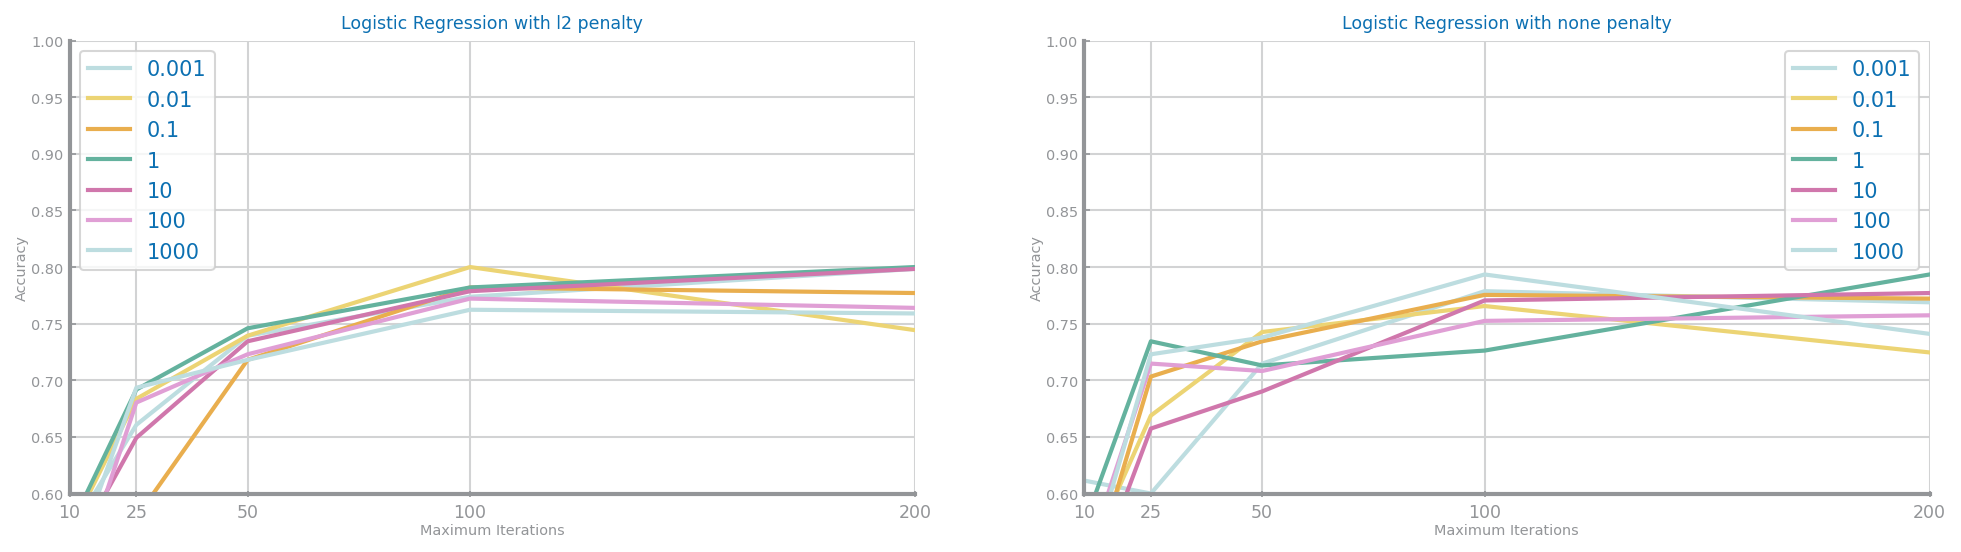

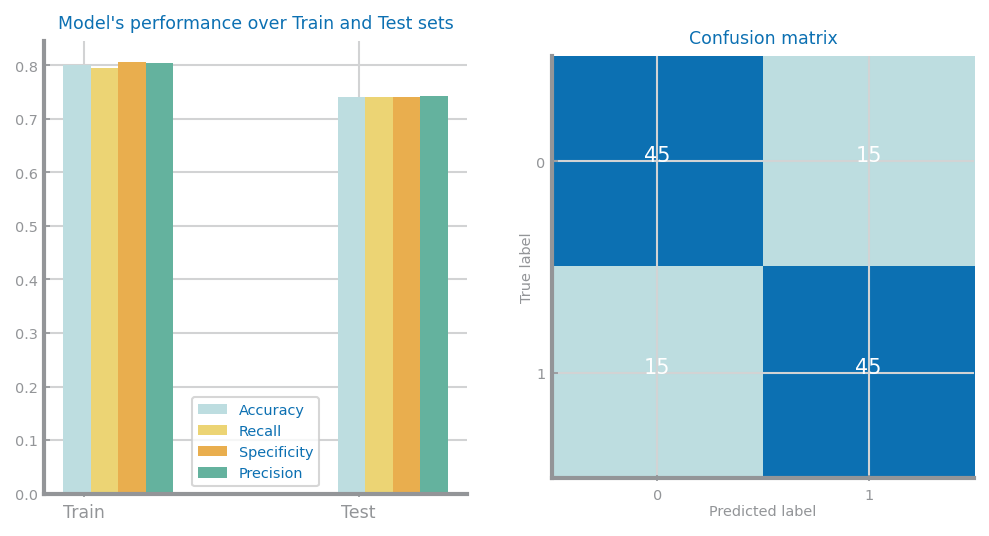








 HF_S_FAnova_extra_outlierTrim_IQS_B
	Model Statistics
    Accuracy  0.87  0.83
      Recall  0.88  0.84
 Specificity  0.86  0.82
   Precision  0.86  0.82


<Figure size 600x450 with 0 Axes>

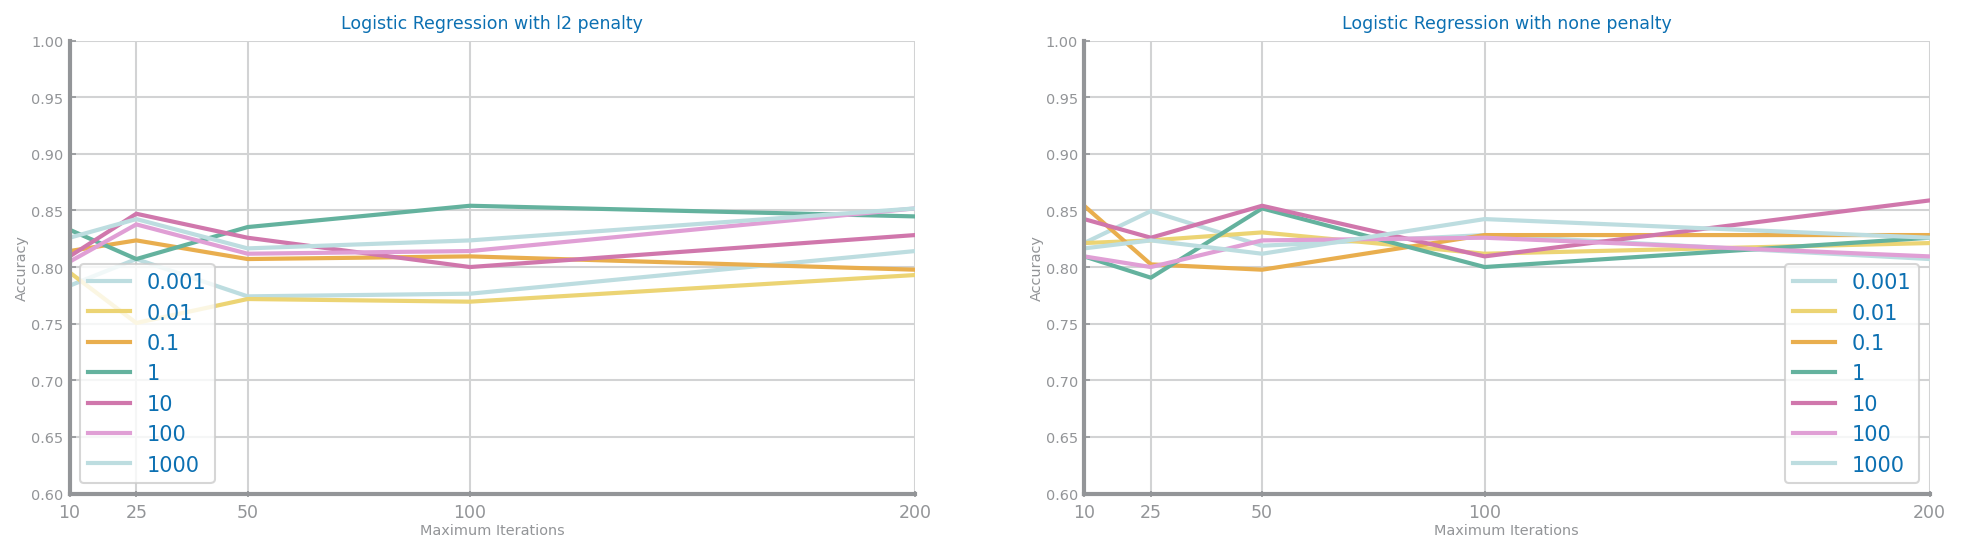

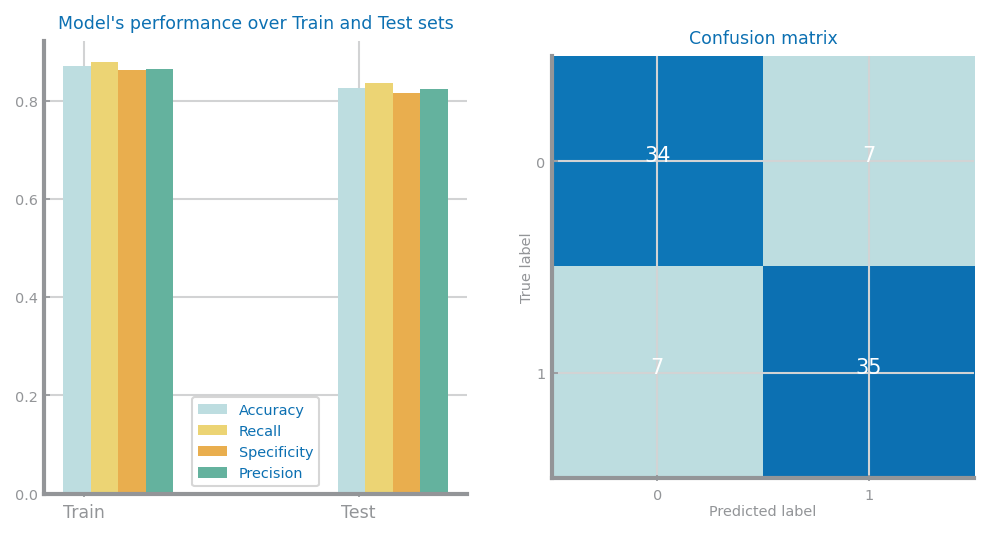








 HF_S_FAnova_outlierTrim_IQS_B
	Model Statistics
    Accuracy  0.85  0.85
      Recall  0.86  0.84
 Specificity  0.84  0.85
   Precision  0.84  0.85


<Figure size 600x450 with 0 Axes>

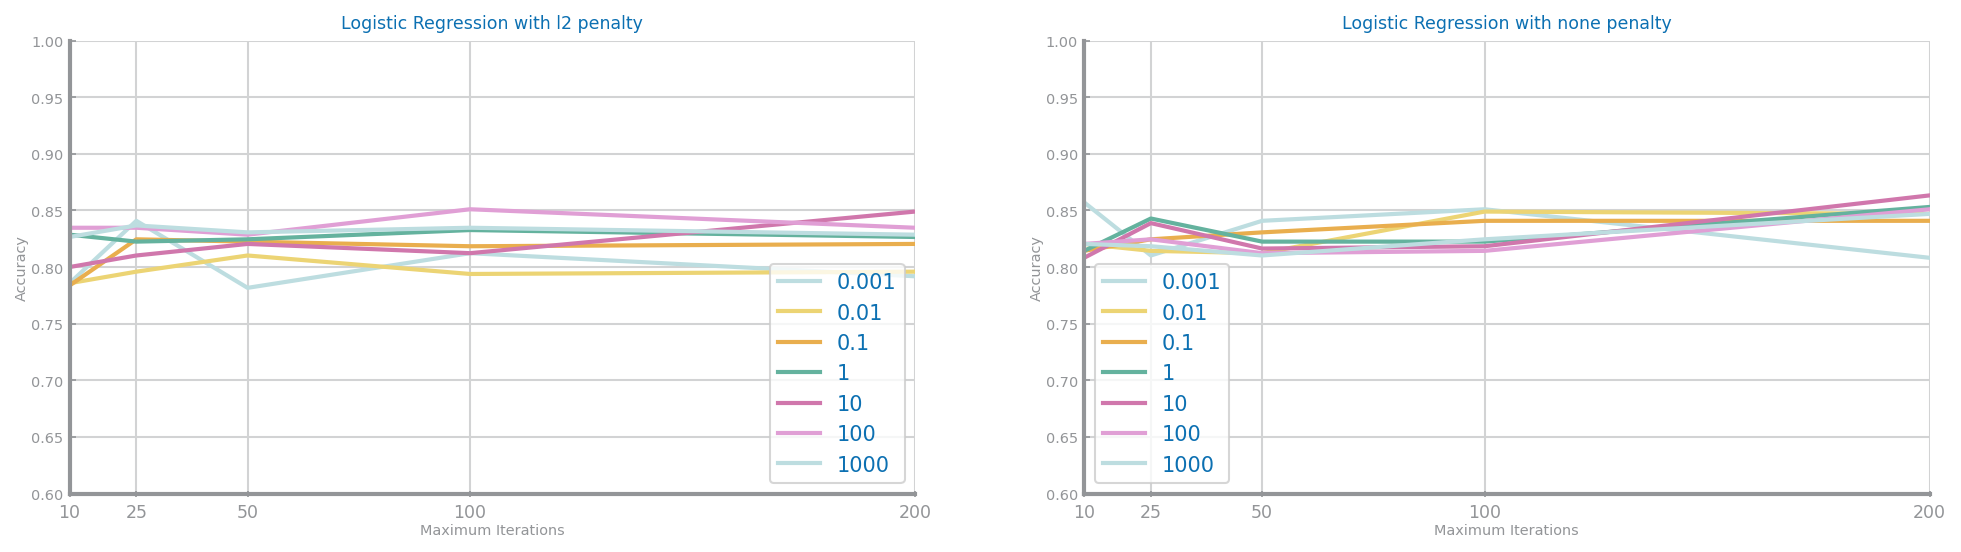

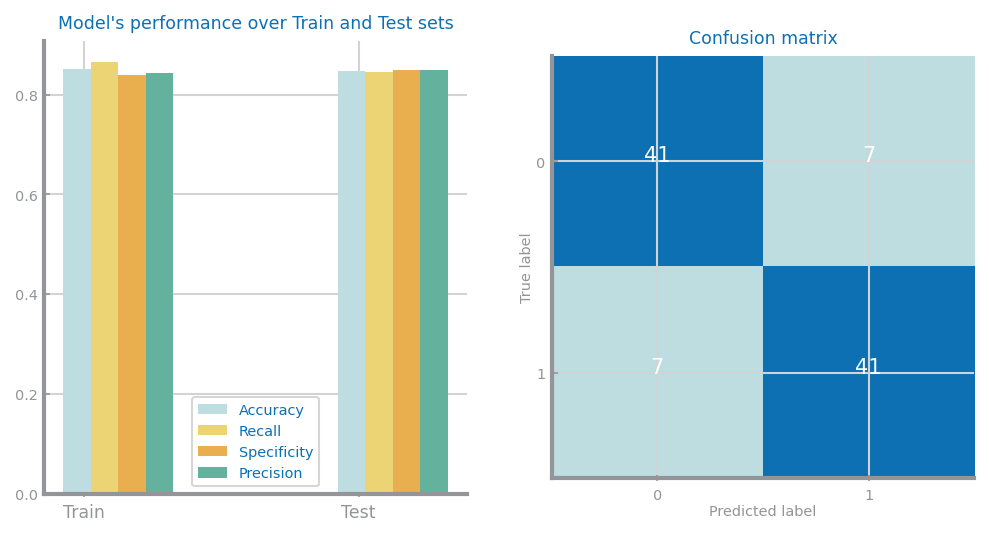








 HR_standardized_anova
	Model Statistics
    Accuracy  0.84  0.82
      Recall  0.70  0.65
 Specificity  0.91  0.90
   Precision  0.79  0.76


<Figure size 600x450 with 0 Axes>

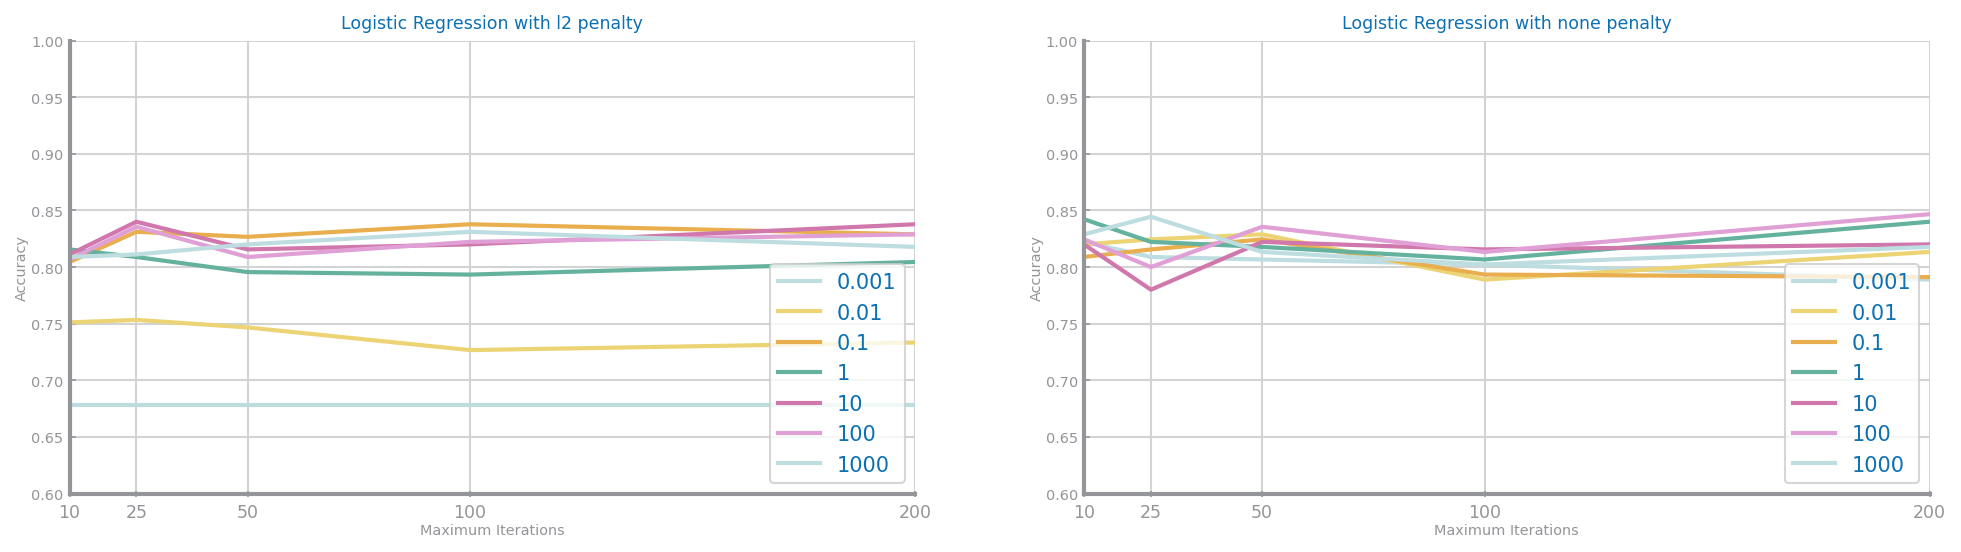

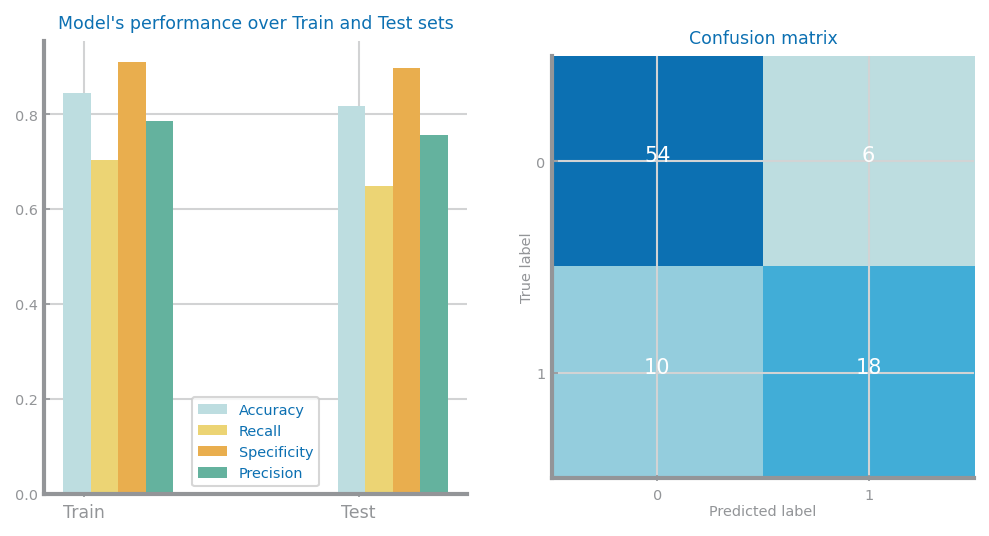








 HR_standardized_corr
	Model Statistics
    Accuracy  0.84  0.83
      Recall  0.71  0.70
 Specificity  0.91  0.89
   Precision  0.78  0.75


<Figure size 600x450 with 0 Axes>

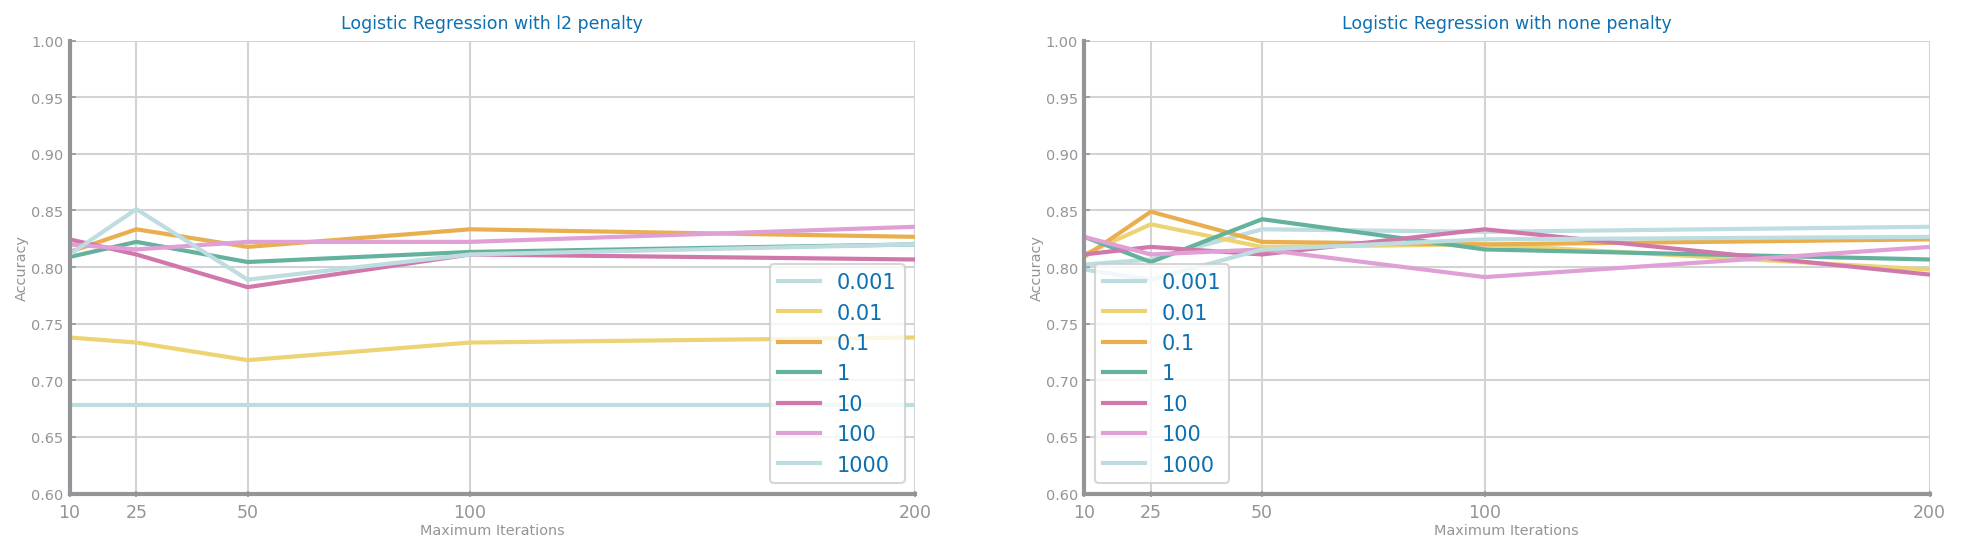

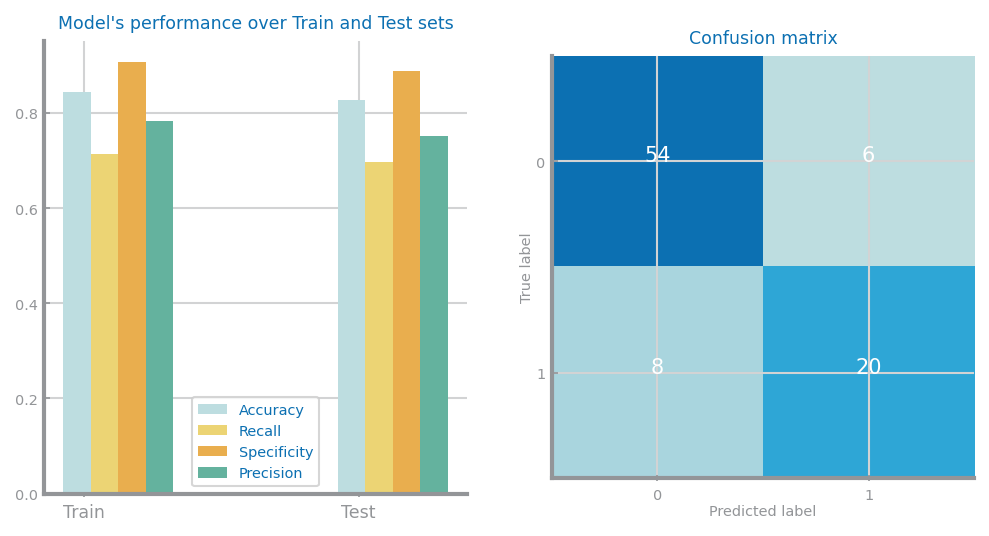








 HR_standardized_extra
	Model Statistics
    Accuracy  0.86  0.82
      Recall  0.72  0.74
 Specificity  0.93  0.85
   Precision  0.82  0.72


<Figure size 600x450 with 0 Axes>

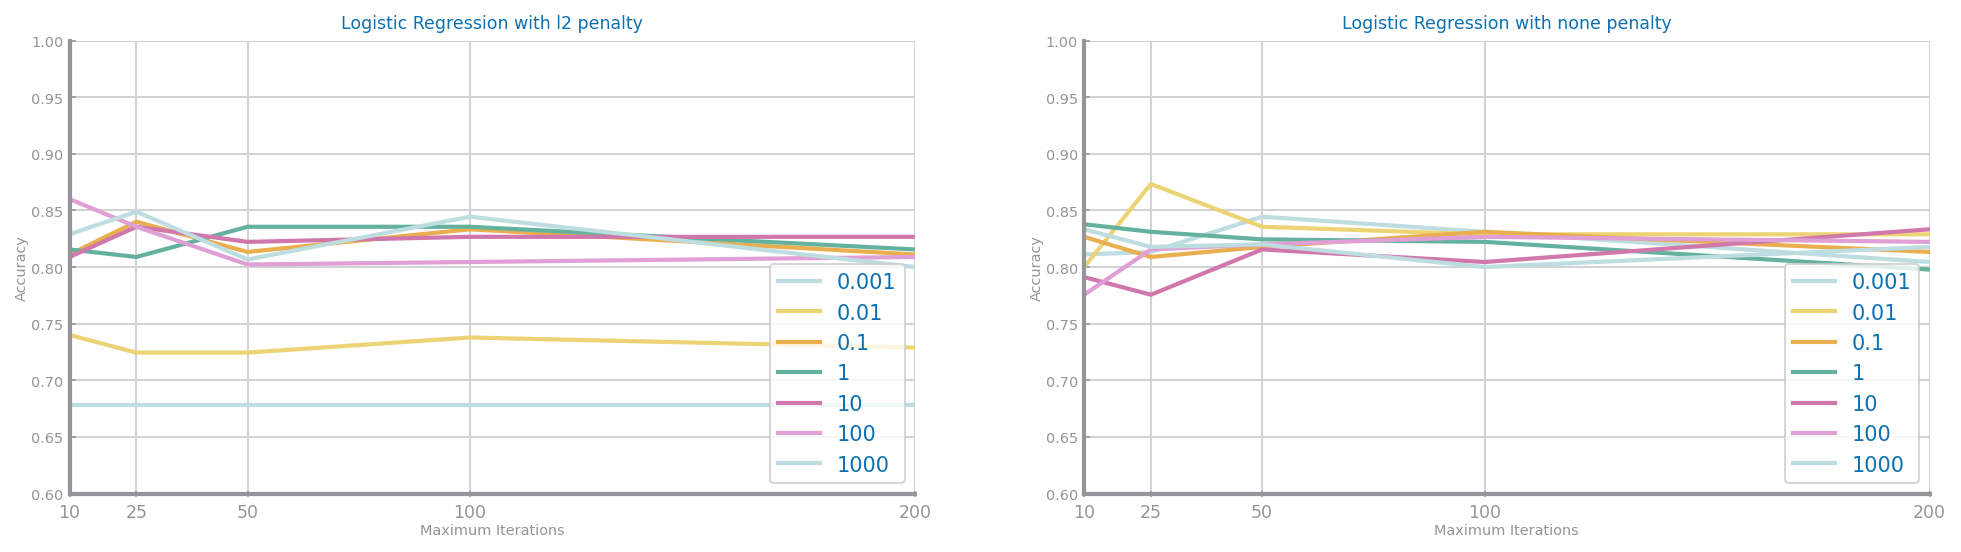

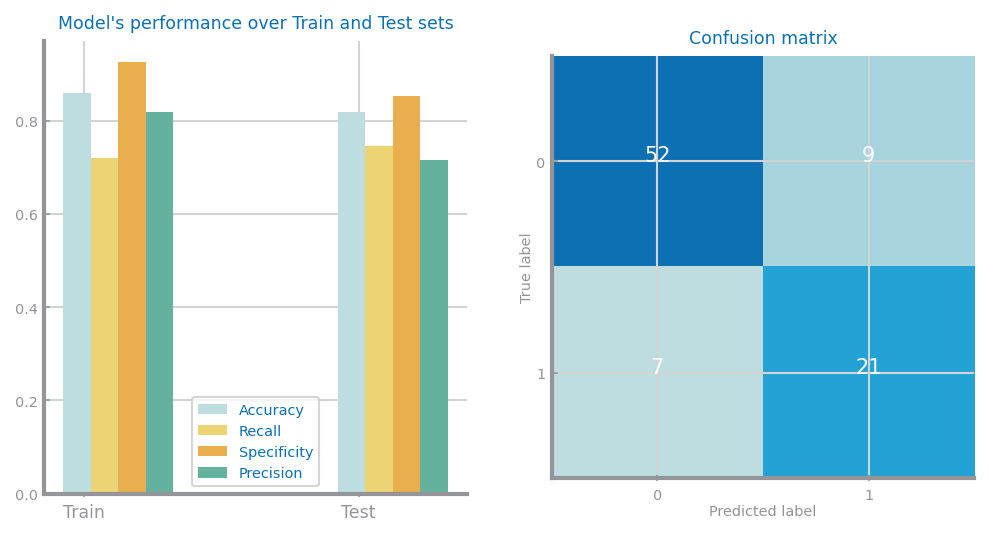








 HR_standardized_extraTreeClassifier
	Model Statistics
    Accuracy  0.83  0.84
      Recall  0.67  0.73
 Specificity  0.91  0.89
   Precision  0.78  0.76


<Figure size 600x450 with 0 Axes>

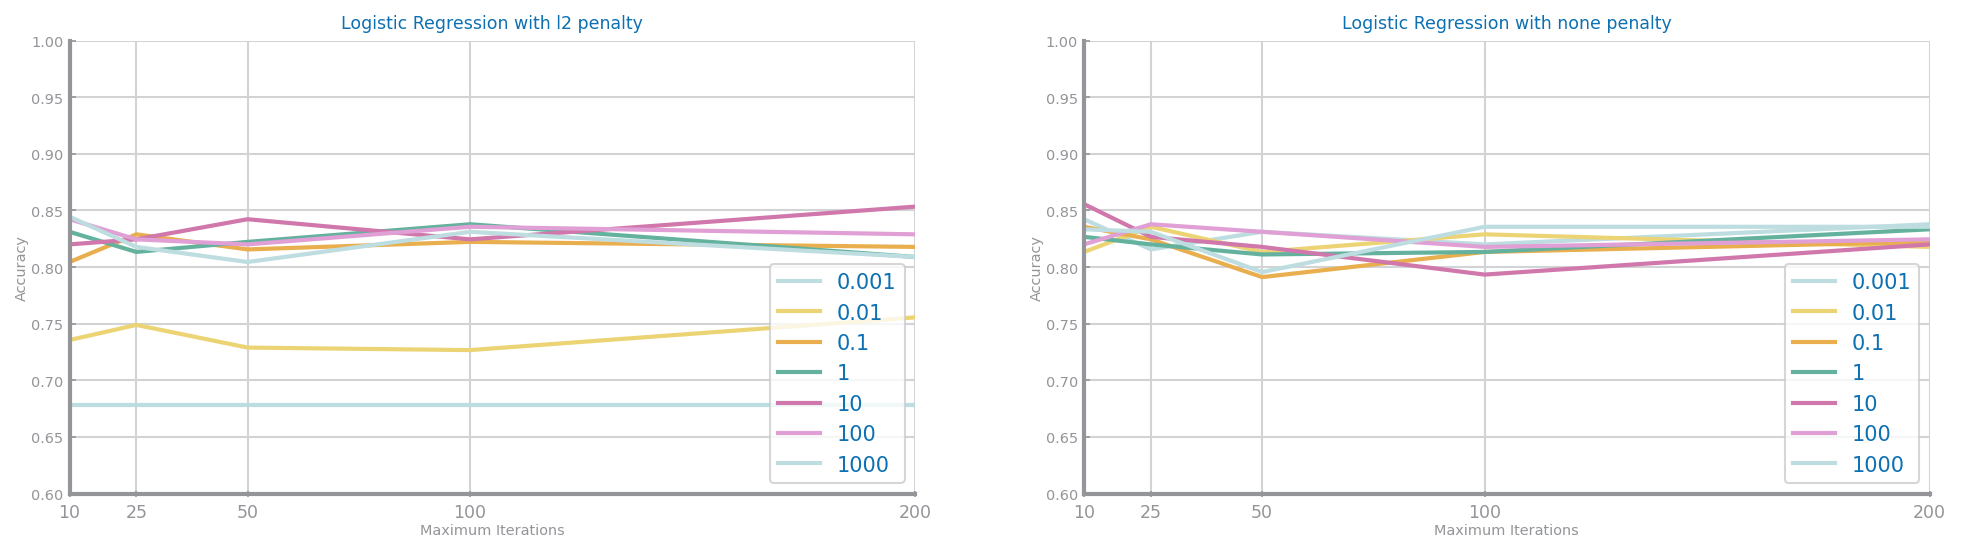

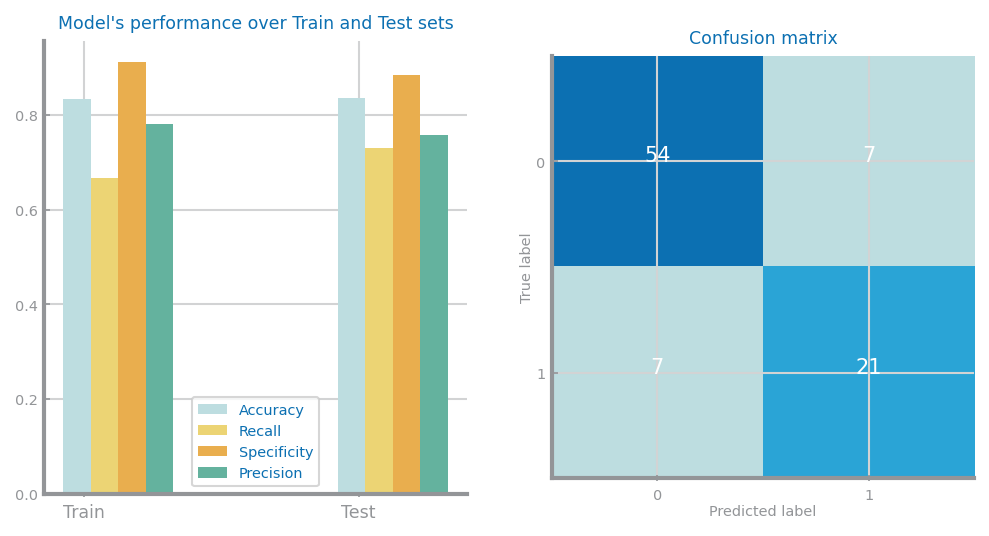








 HR_standardized_extra_anova
	Model Statistics
    Accuracy  0.84  0.85
      Recall  0.68  0.76
 Specificity  0.91  0.90
   Precision  0.79  0.78


<Figure size 600x450 with 0 Axes>

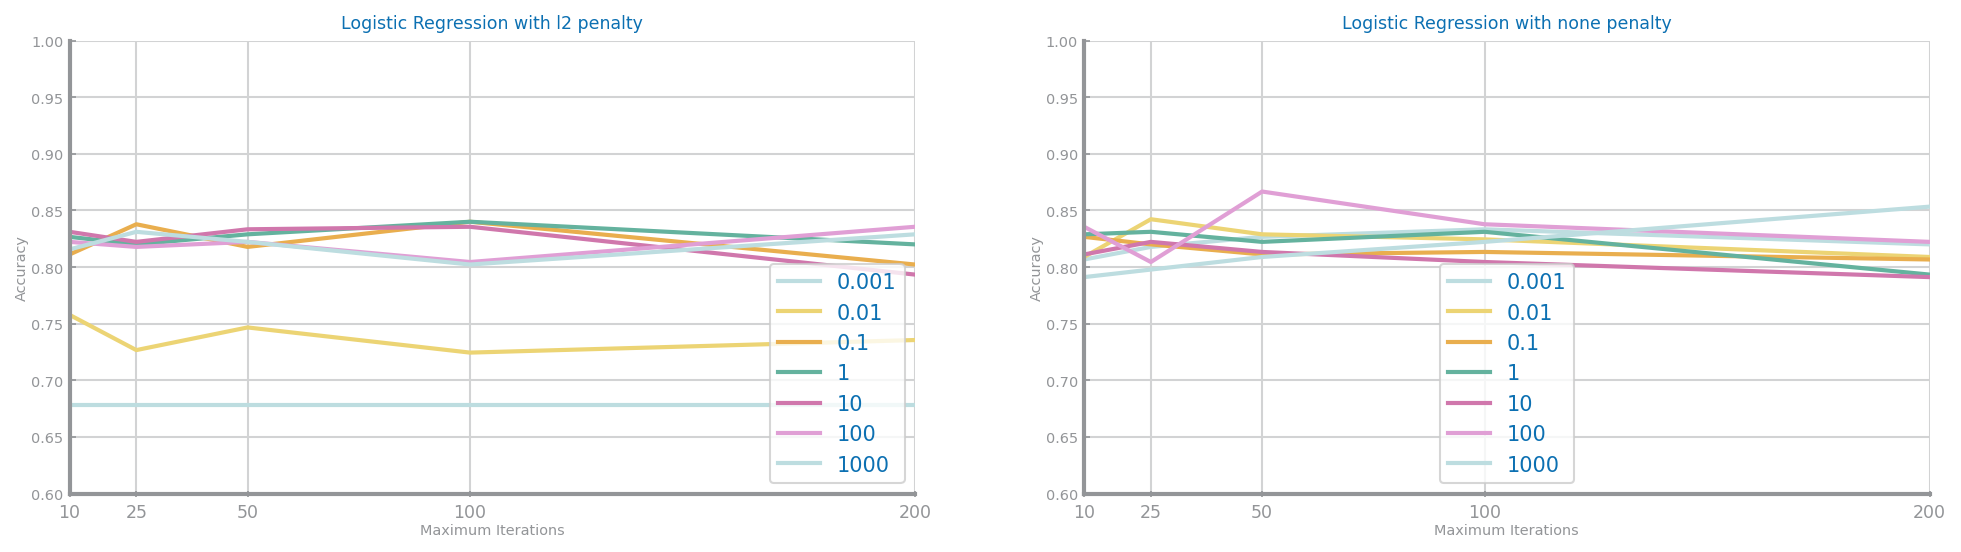

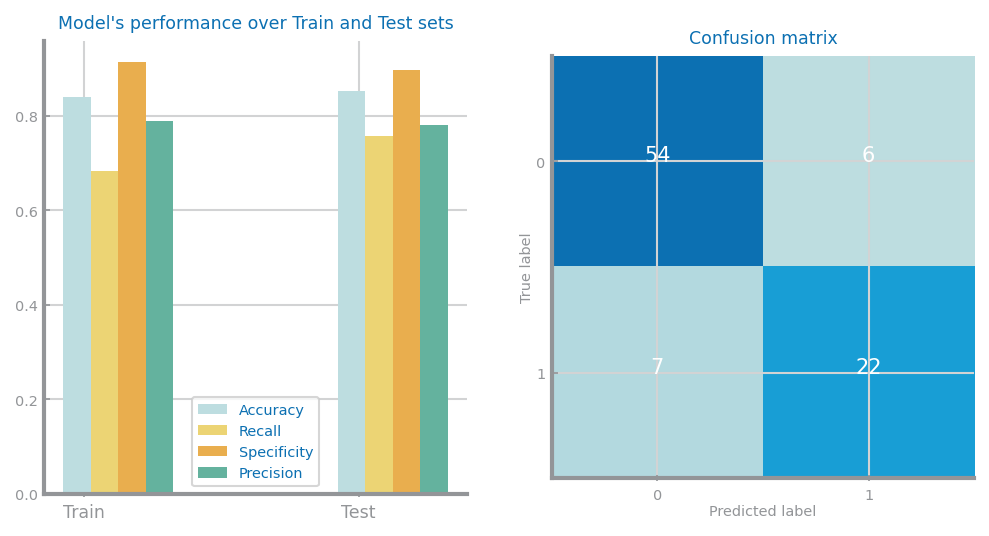








 HR_standardized_extra_lasso
	Model Statistics
    Accuracy  0.84  0.82
      Recall  0.69  0.67
 Specificity  0.91  0.89
   Precision  0.78  0.75


<Figure size 600x450 with 0 Axes>

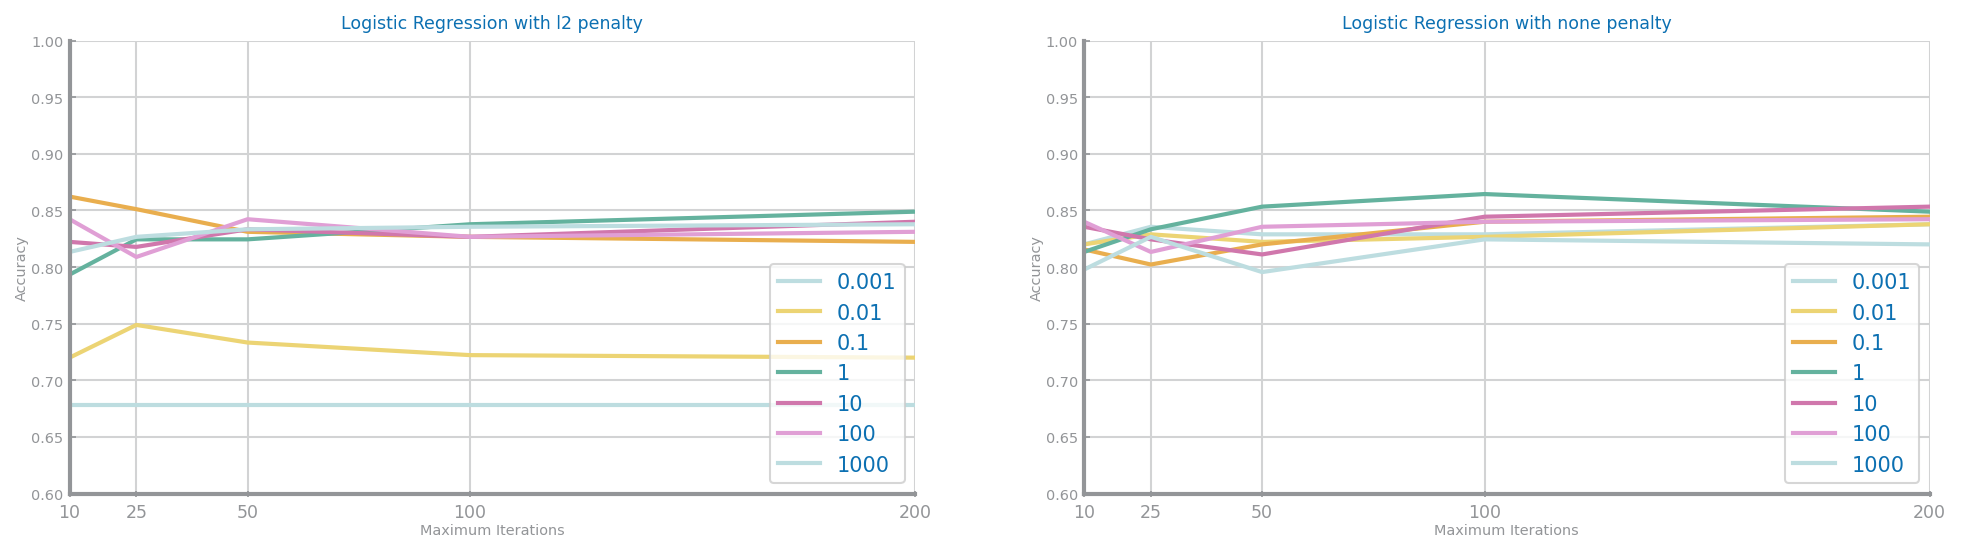

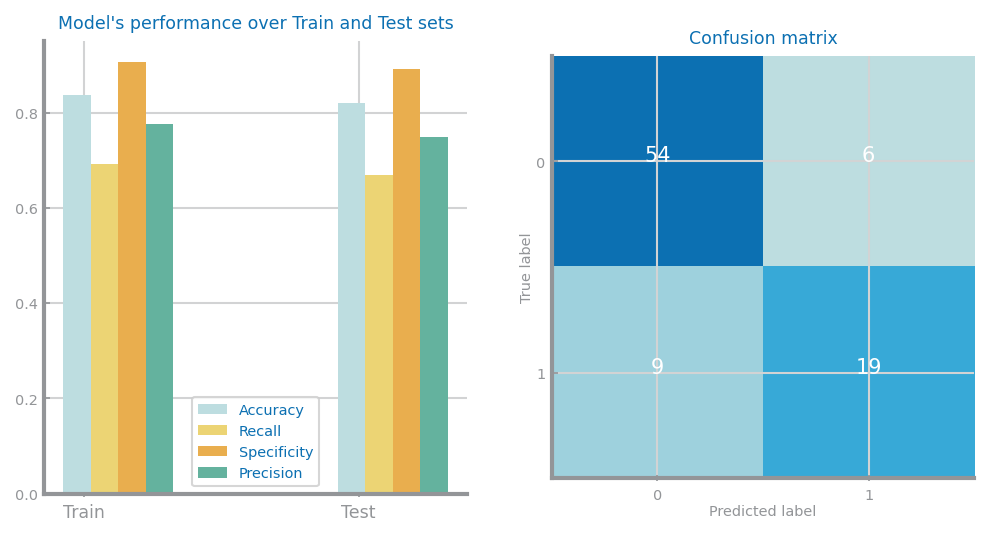








 HR_standardized_extra_mixed
	Model Statistics
    Accuracy  0.85  0.82
      Recall  0.71  0.67
 Specificity  0.92  0.90
   Precision  0.80  0.75


<Figure size 600x450 with 0 Axes>

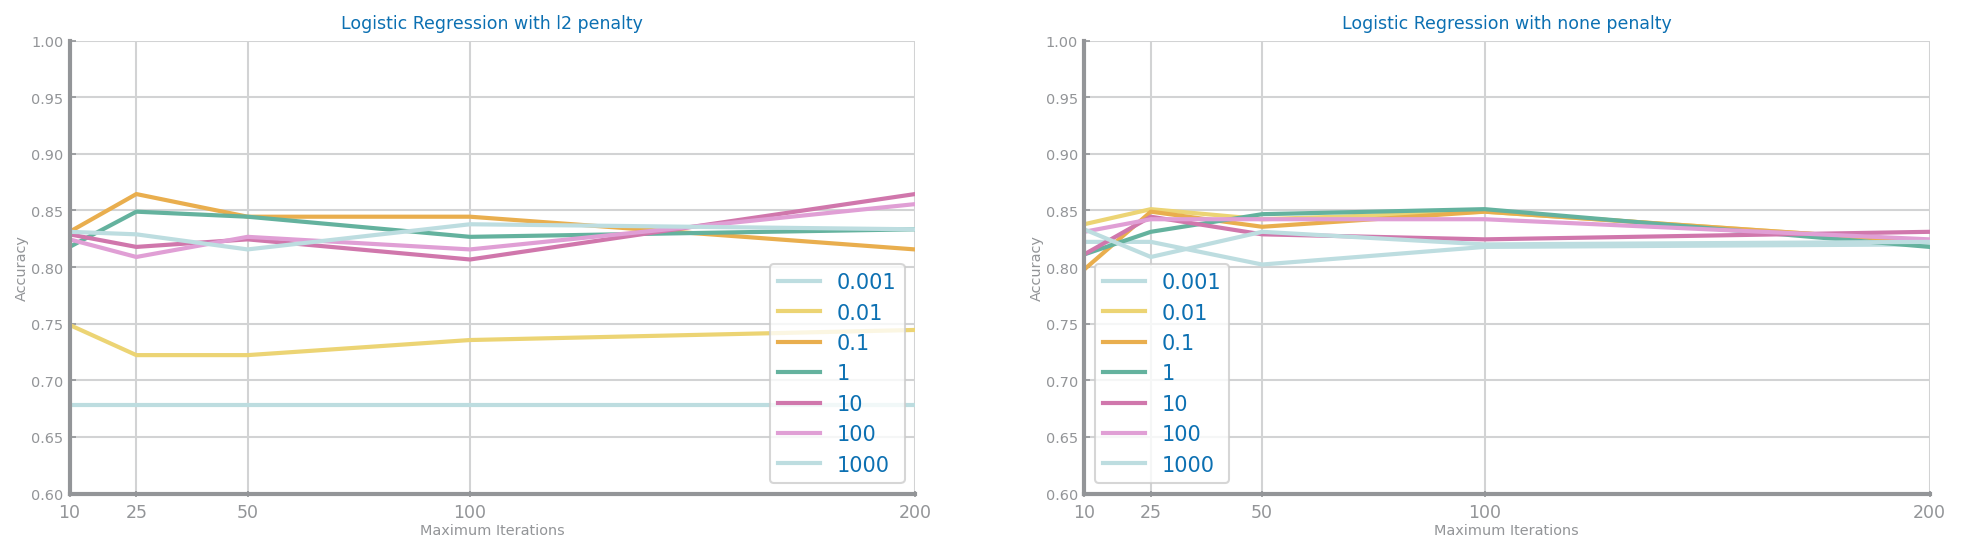

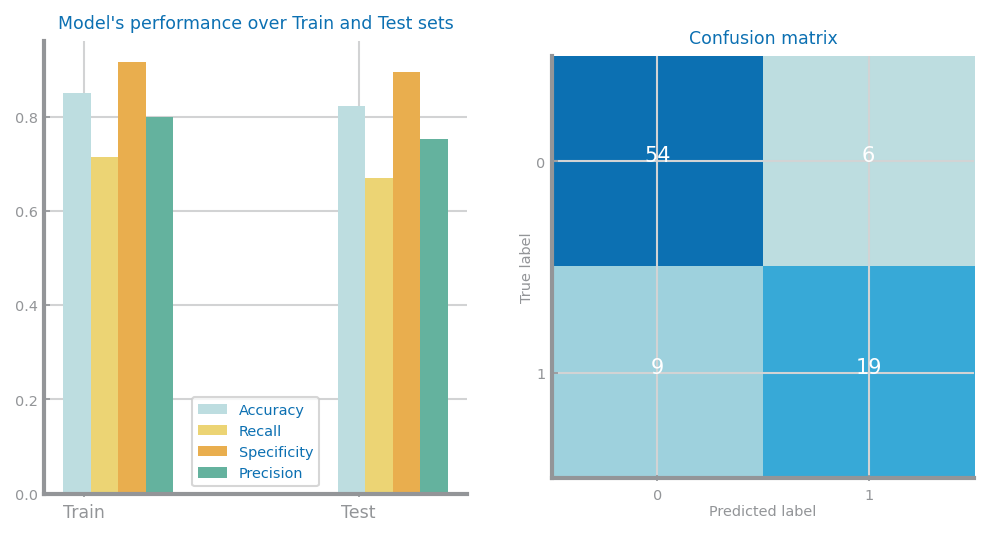








 HR_standardized_extra_rfe
	Model Statistics
    Accuracy  0.84  0.83
      Recall  0.71  0.65
 Specificity  0.91  0.91
   Precision  0.78  0.80


<Figure size 600x450 with 0 Axes>

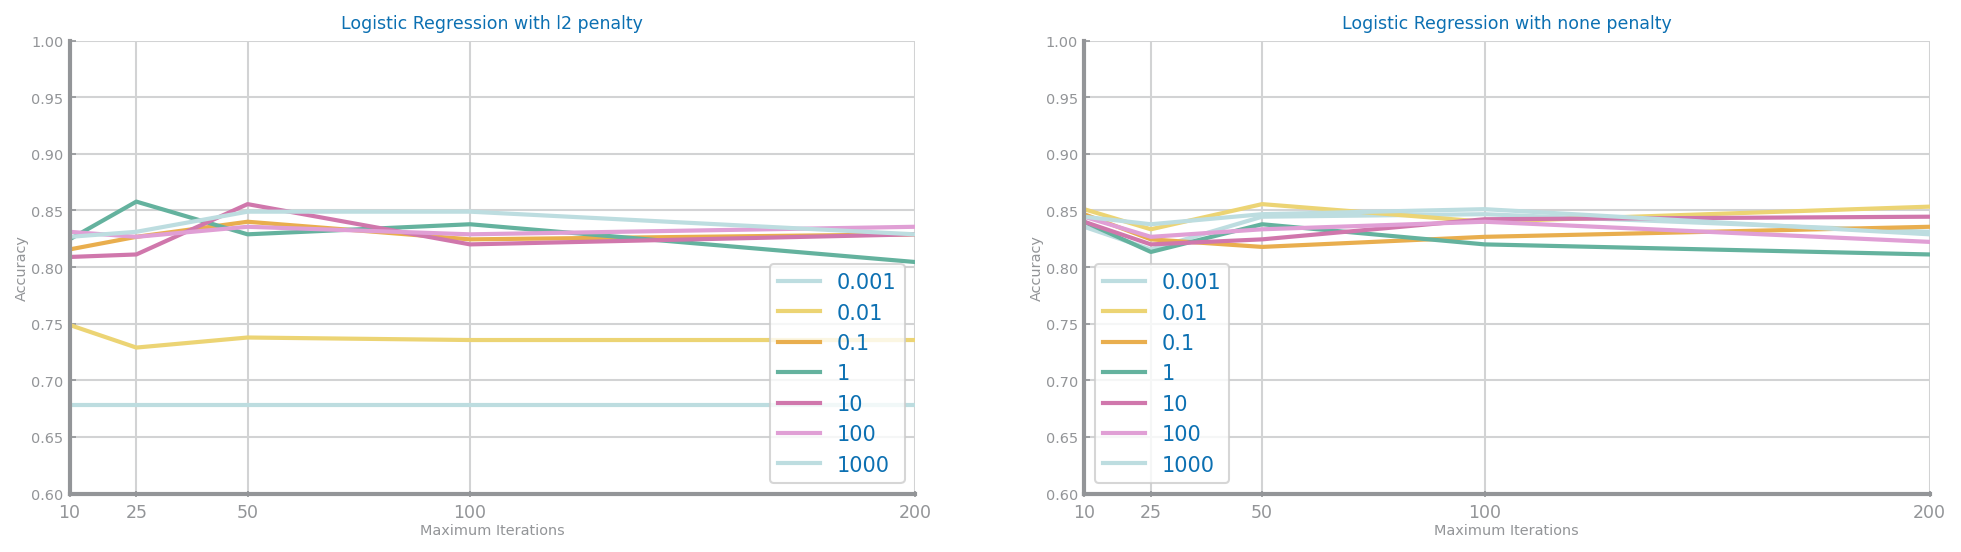

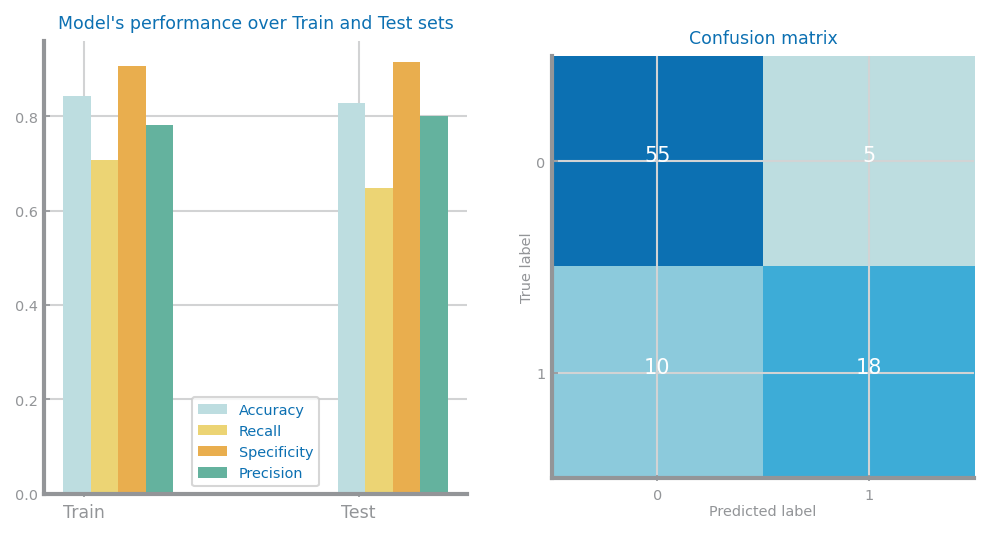








 HR_standardized_lasso
	Model Statistics
    Accuracy  0.84  0.83
      Recall  0.72  0.68
 Specificity  0.90  0.90
   Precision  0.77  0.78


<Figure size 600x450 with 0 Axes>

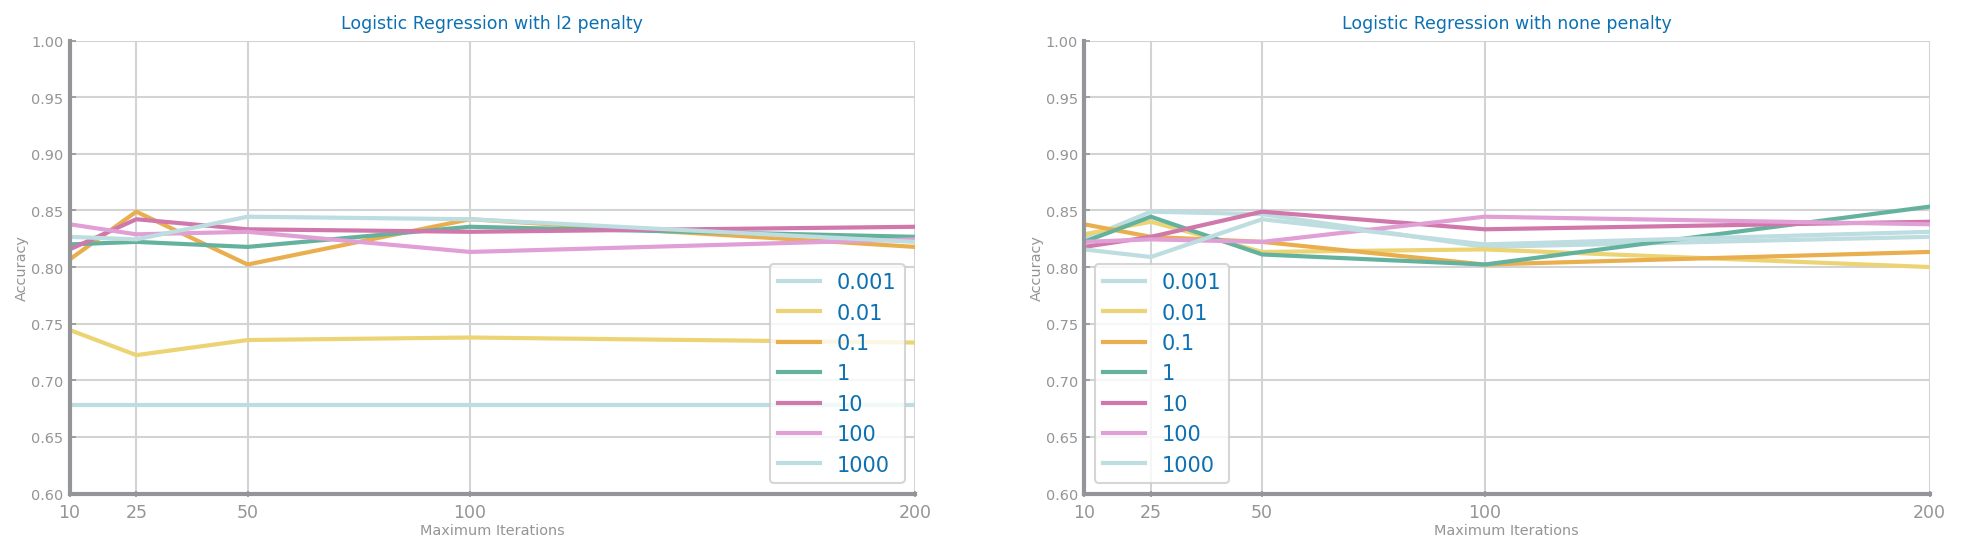

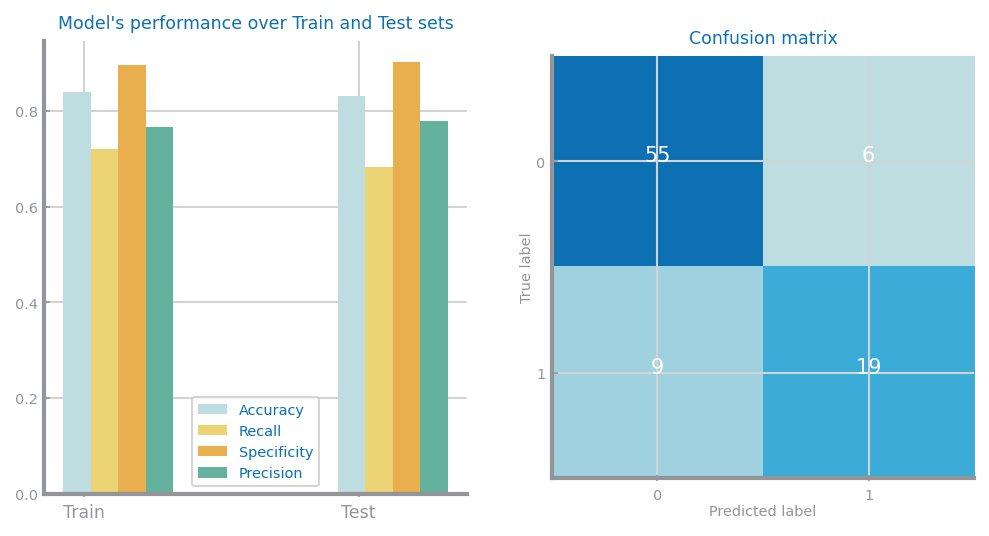








 HR_standardized_mixed
	Model Statistics
    Accuracy  0.84  0.83
      Recall  0.67  0.72
 Specificity  0.91  0.89
   Precision  0.79  0.76


<Figure size 600x450 with 0 Axes>

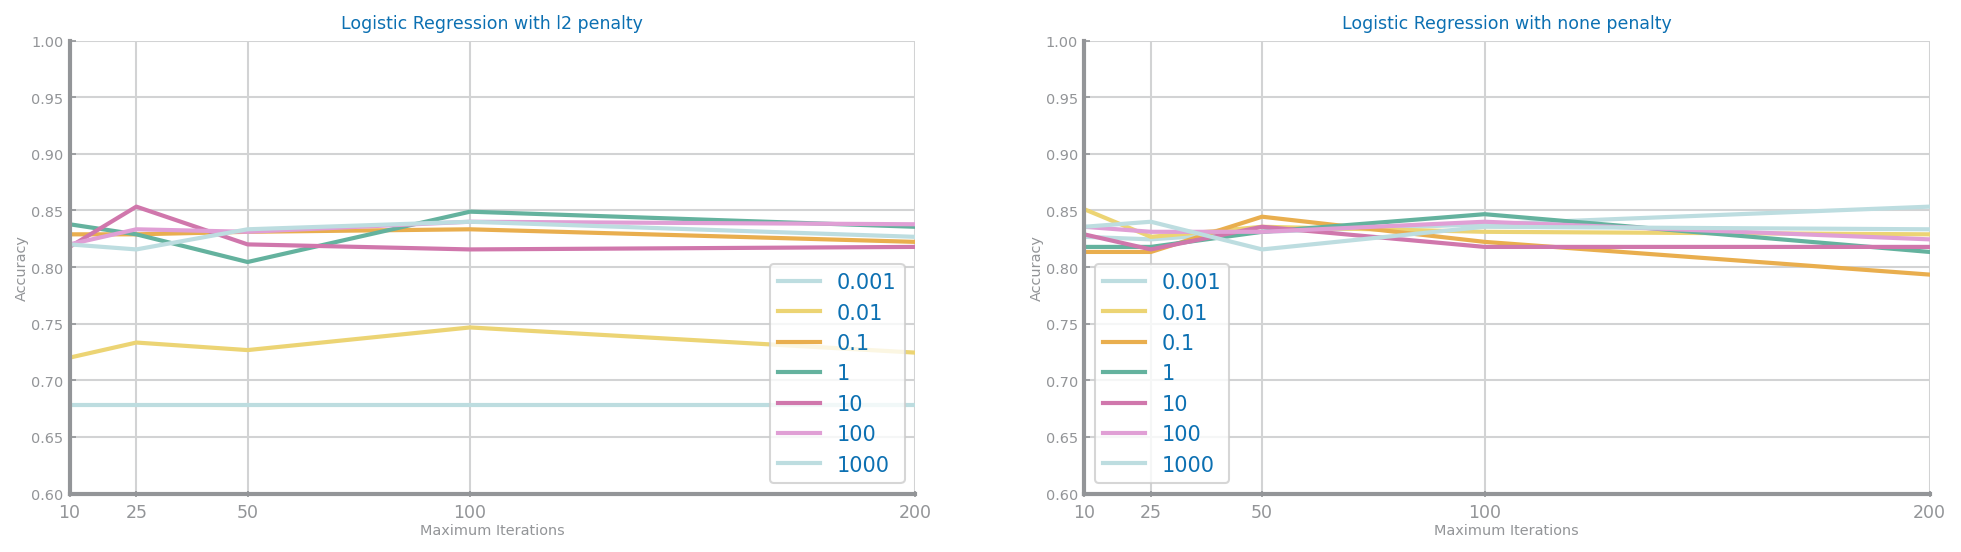

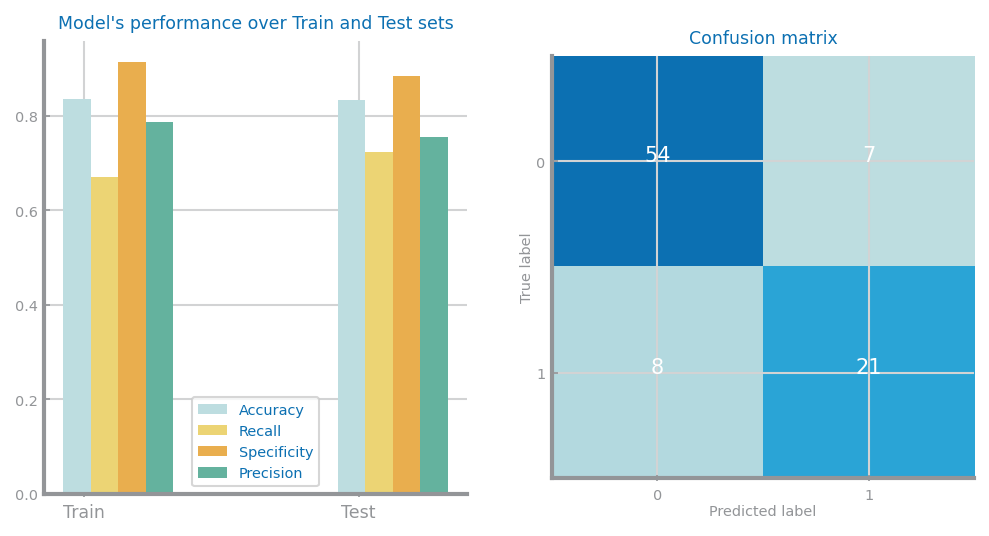








 HR_standardized_rfe
	Model Statistics
    Accuracy  0.84  0.82
      Recall  0.69  0.69
 Specificity  0.91  0.88
   Precision  0.79  0.74


<Figure size 600x450 with 0 Axes>

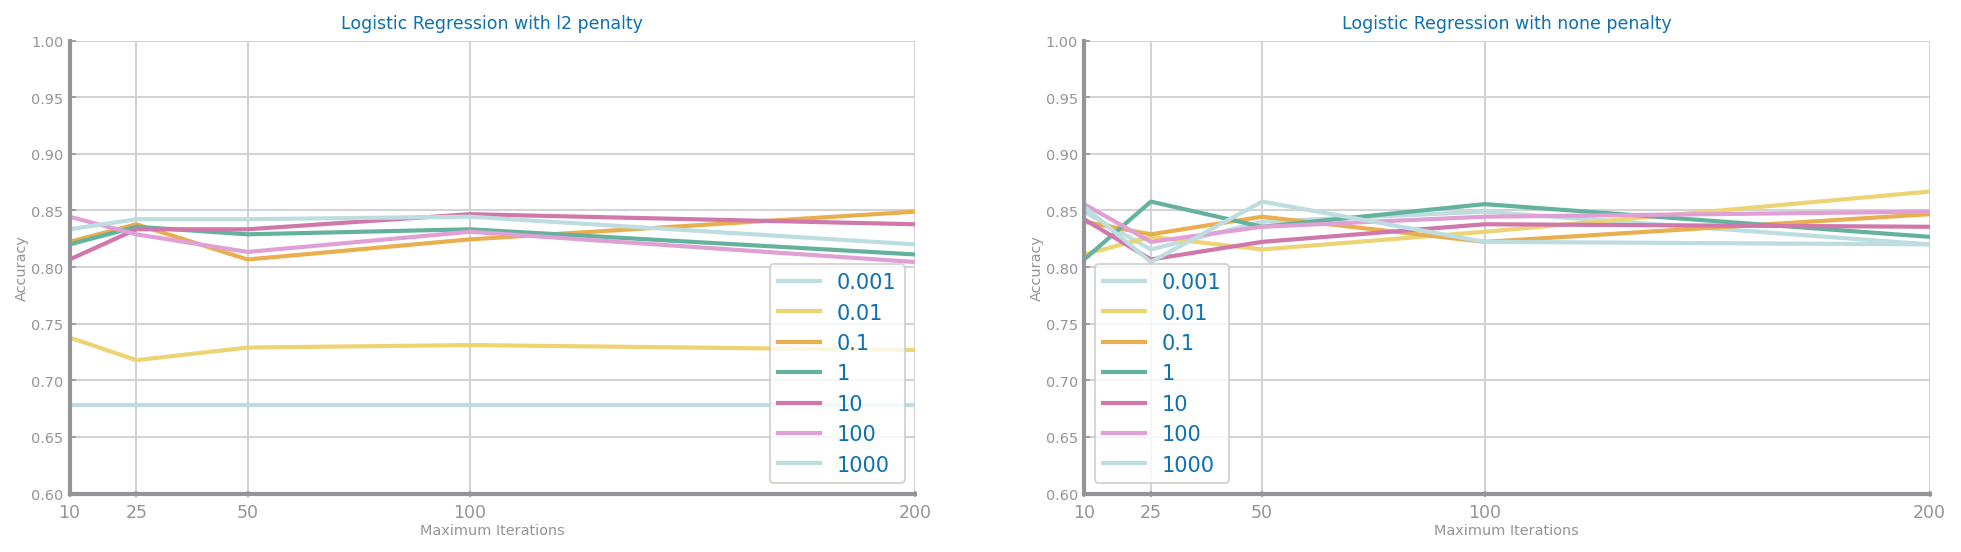

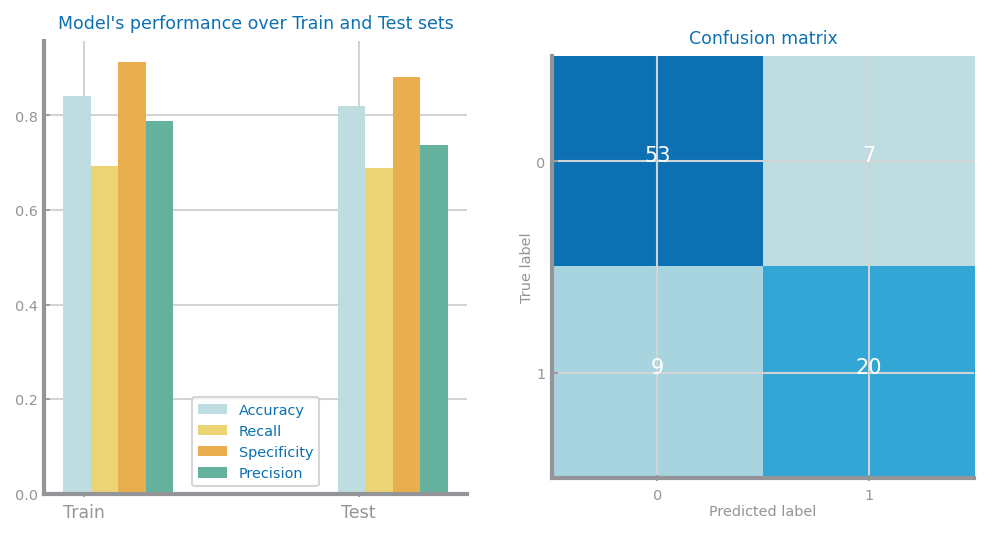








 HR_S_FCorr_extra_outlierTrim_IQS_B
	Model Statistics
    Accuracy  0.86  0.83
      Recall  0.86  0.81
 Specificity  0.86  0.85
   Precision  0.86  0.85


<Figure size 600x450 with 0 Axes>

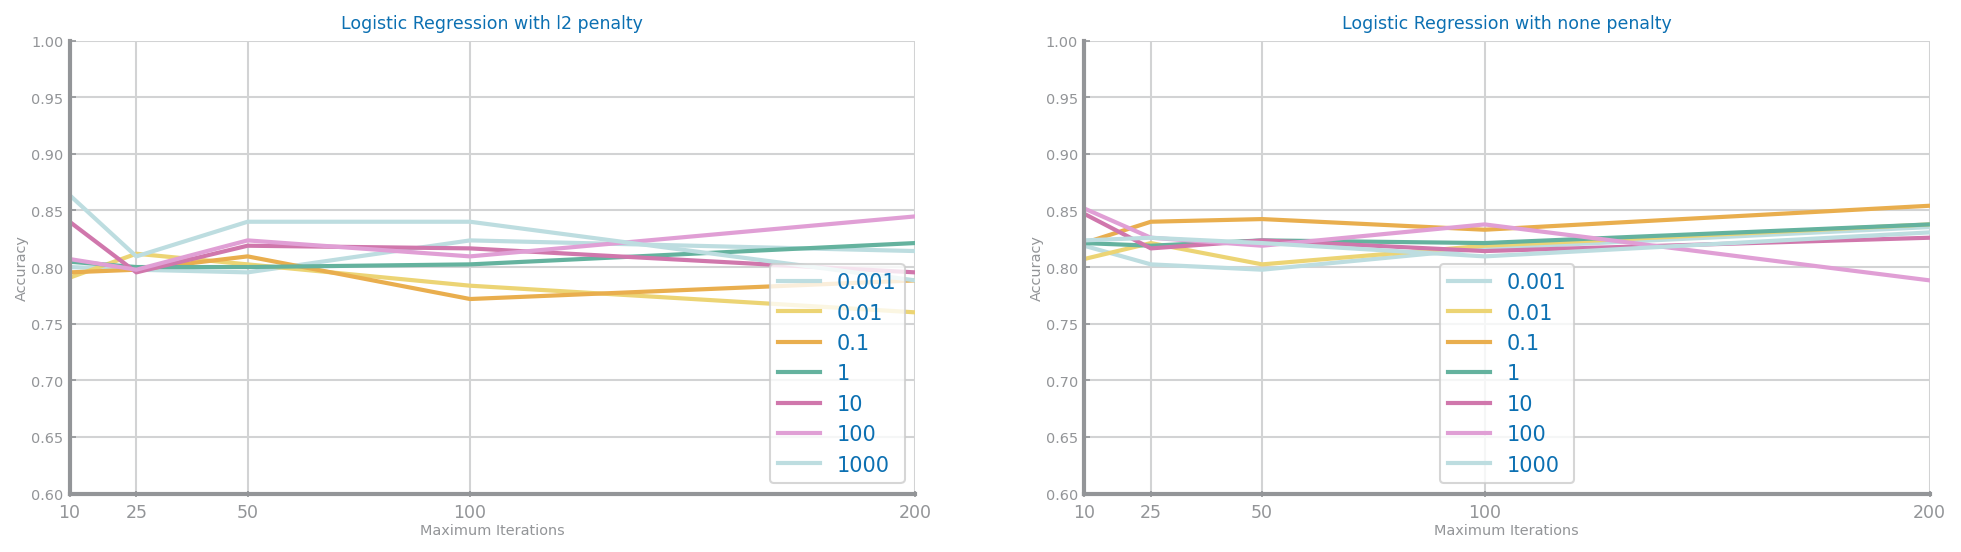

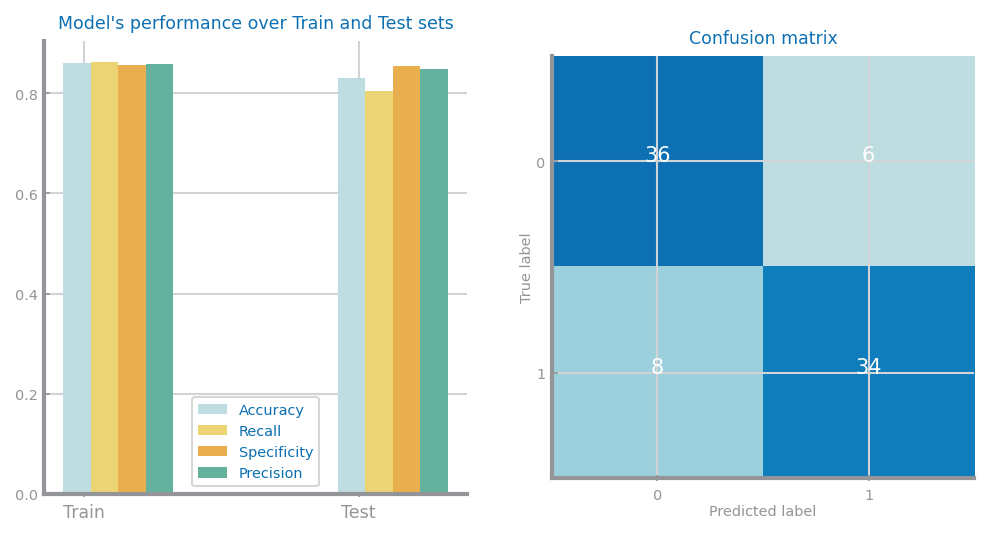








 HR_S_FCorr_outlierTrim_IQS_B
	Model Statistics
    Accuracy  0.84  0.85
      Recall  0.86  0.87
 Specificity  0.82  0.84
   Precision  0.83  0.85


<Figure size 600x450 with 0 Axes>

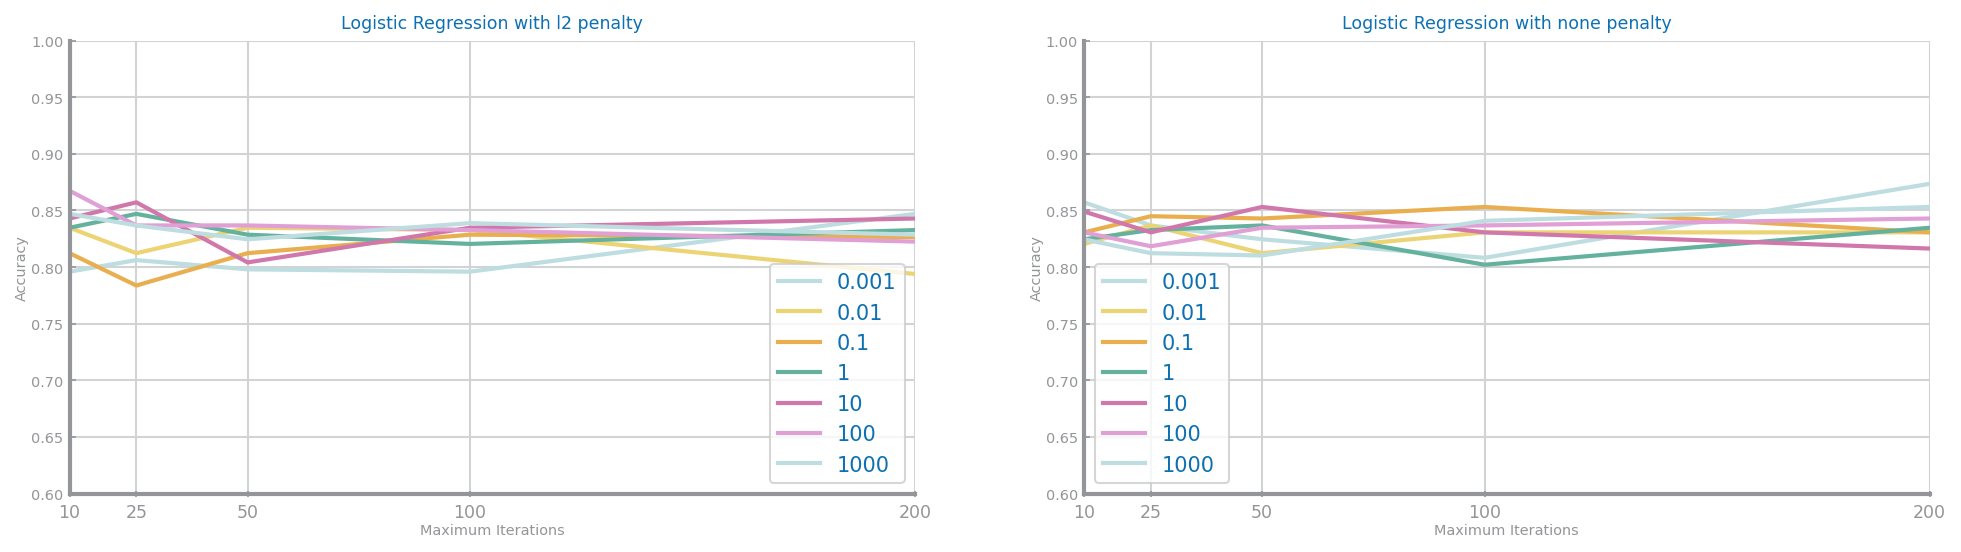

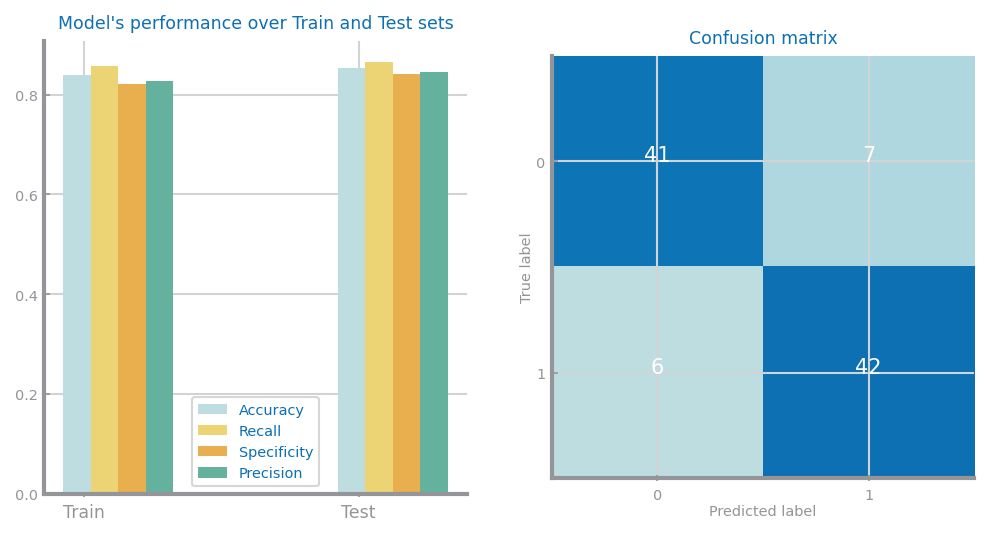








 HR_S_FImp_extra_outlierTrim_IQS_B
	Model Statistics
    Accuracy  0.83  0.83
      Recall  0.84  0.82
 Specificity  0.83  0.84
   Precision  0.83  0.84


<Figure size 600x450 with 0 Axes>

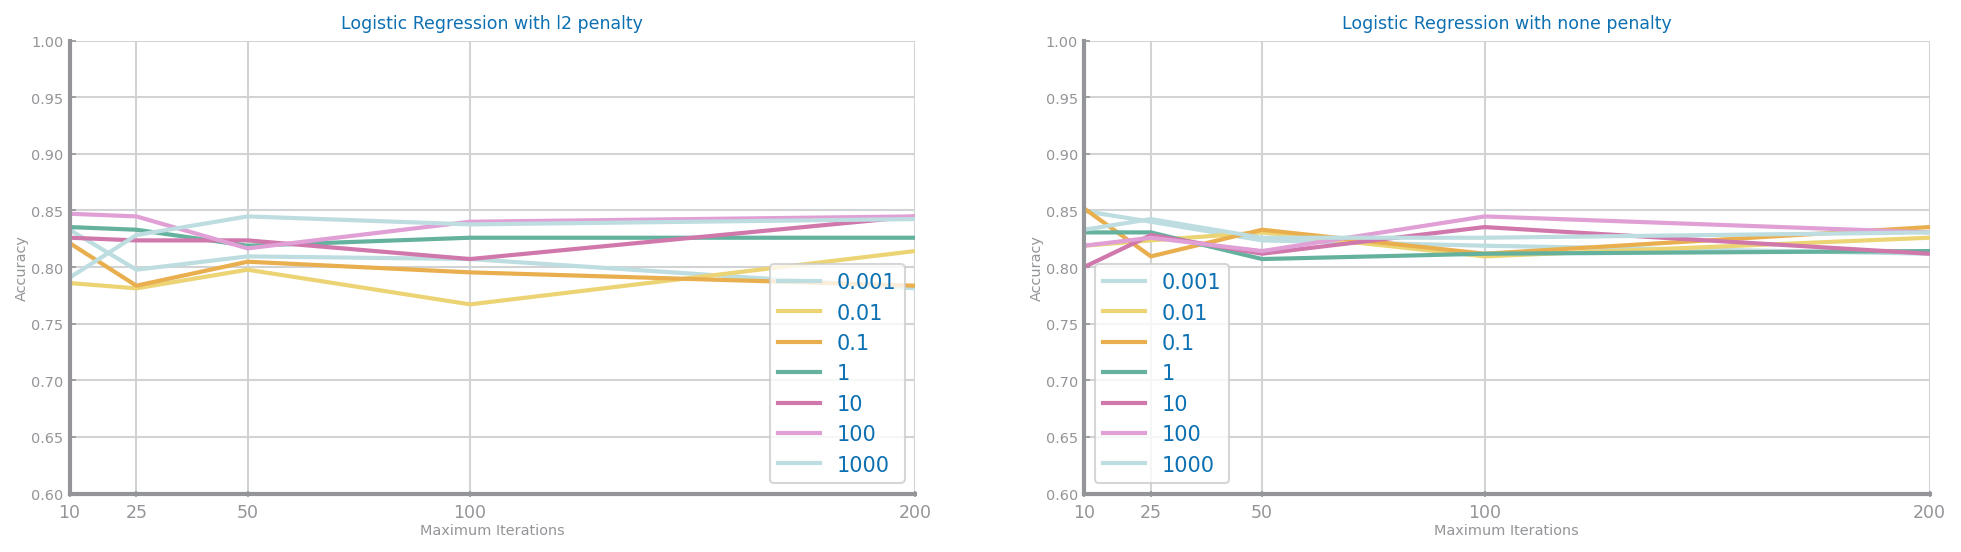

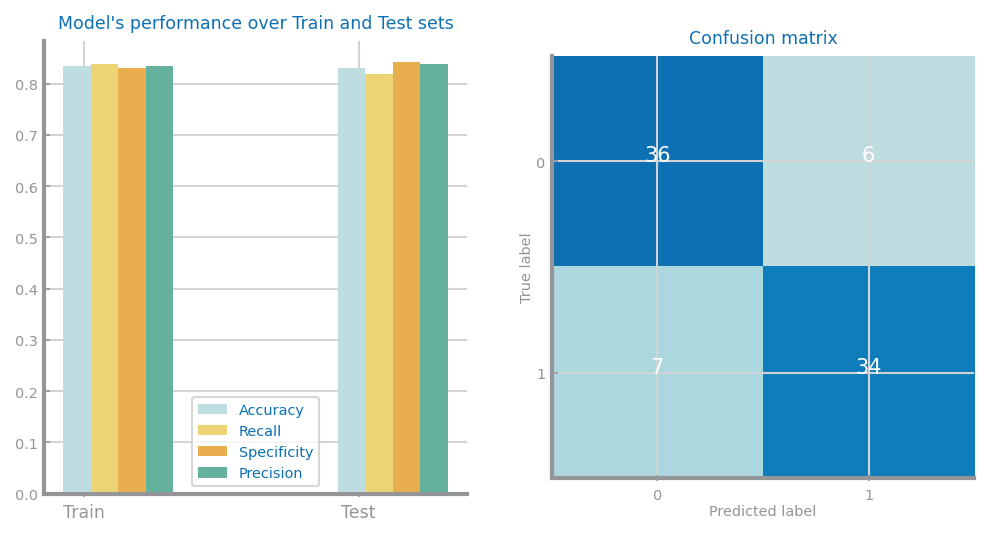








 HR_S_FImp_outlierTrim_IQS_B
	Model Statistics
    Accuracy  0.84  0.80
      Recall  0.84  0.83
 Specificity  0.84  0.77
   Precision  0.84  0.79


<Figure size 600x450 with 0 Axes>

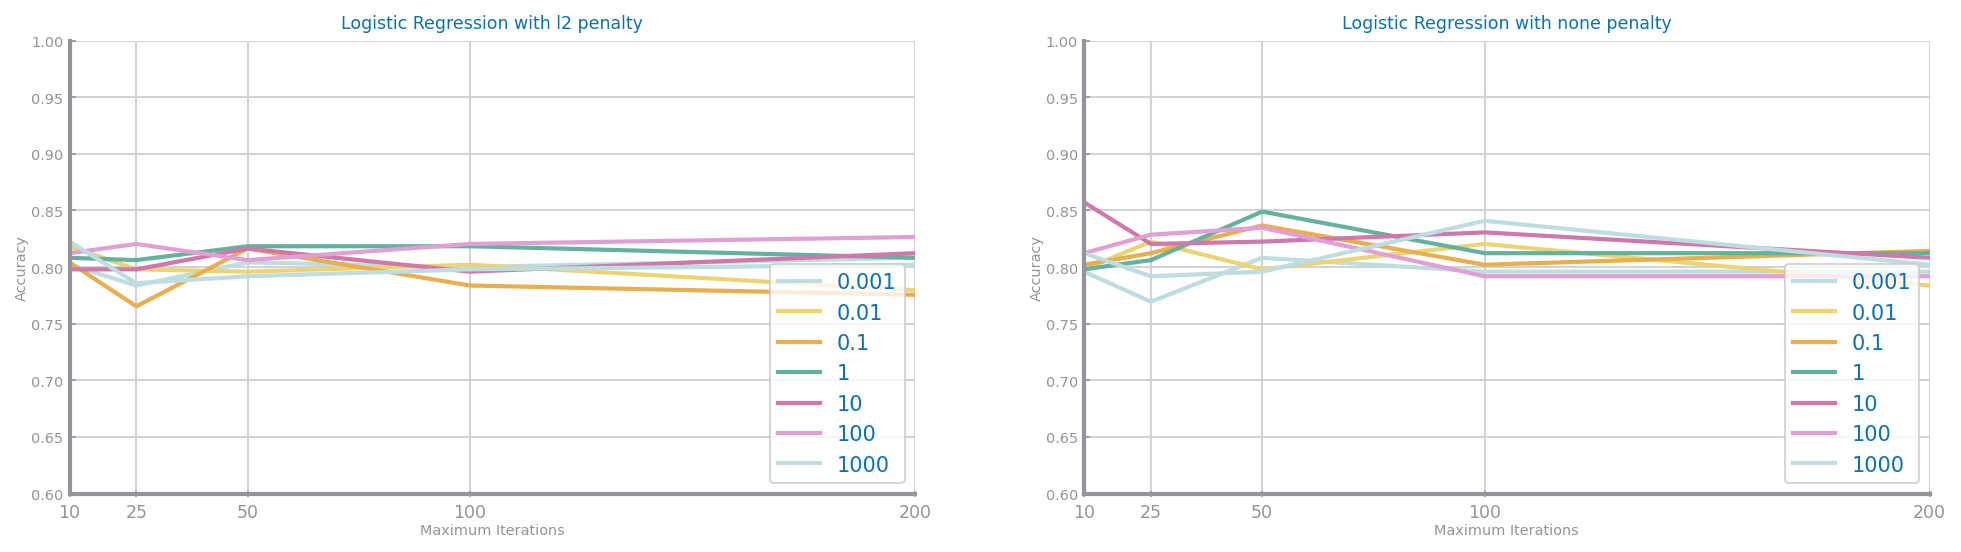

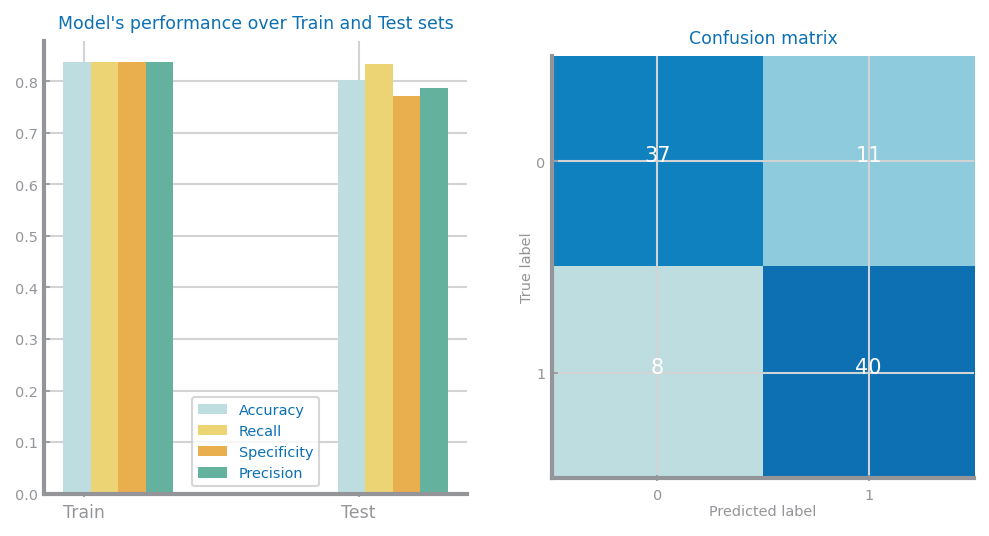








 HR_S_FMixed_extra_outlierTrim_IQS_B
	Model Statistics
    Accuracy  0.85  0.85
      Recall  0.85  0.87
 Specificity  0.85  0.83
   Precision  0.85  0.84


<Figure size 600x450 with 0 Axes>

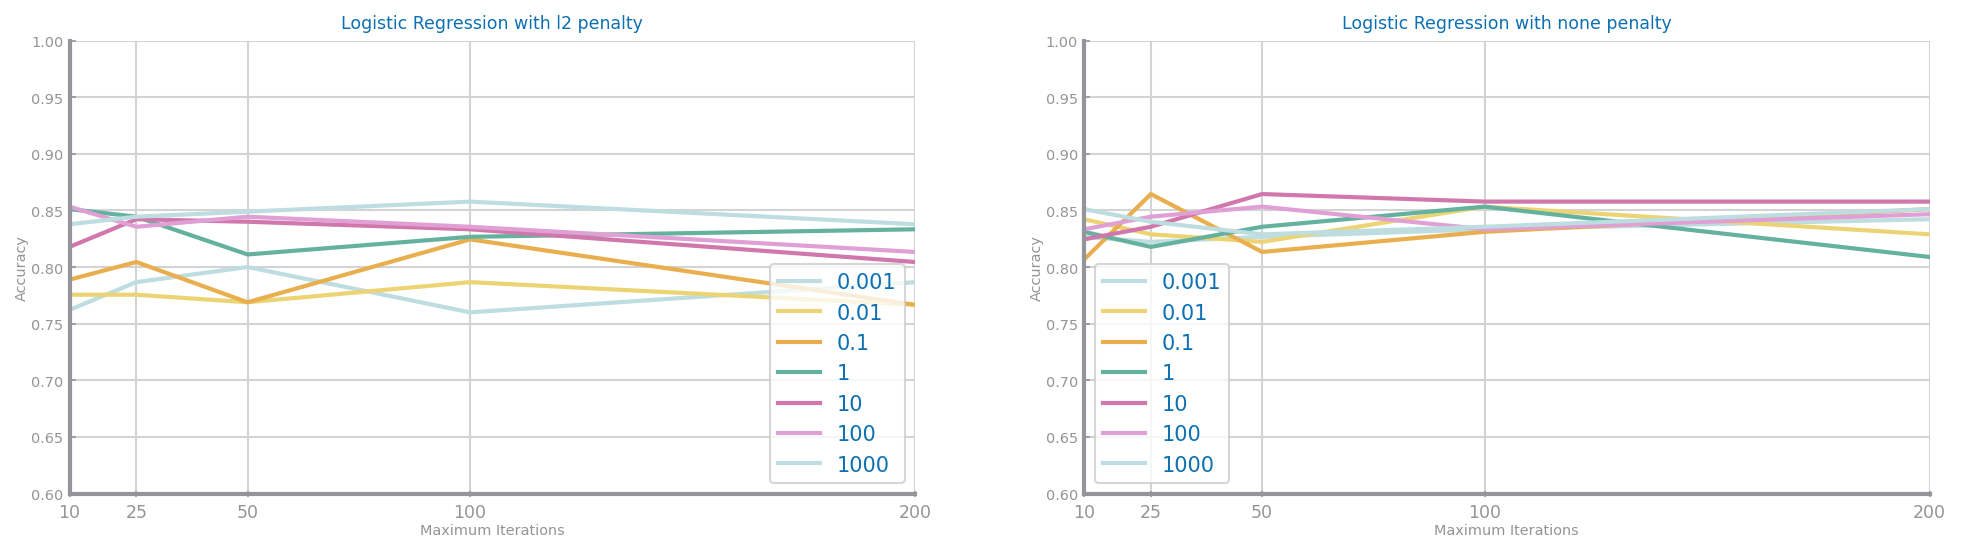

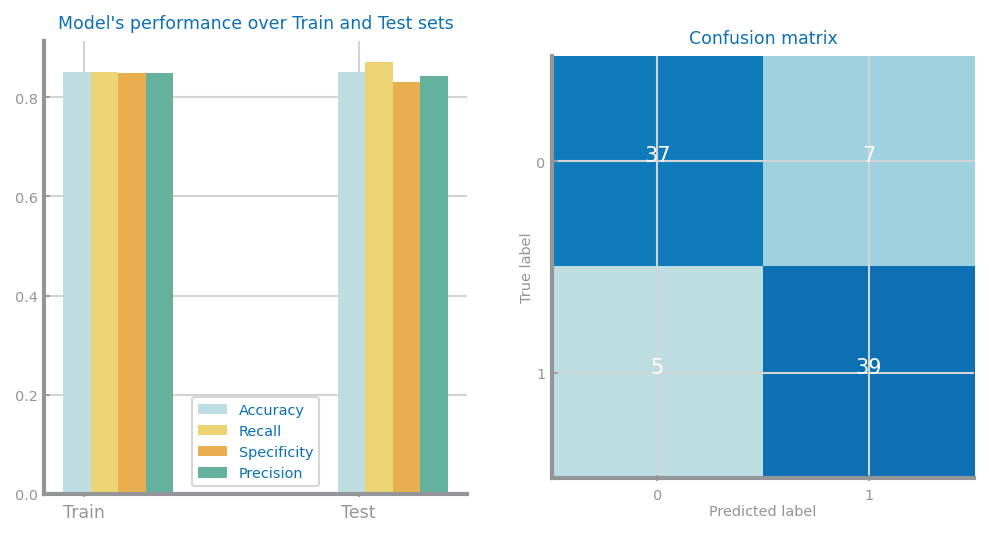








 HR_S_FMixed_outlierTrim_IQS_B
	Model Statistics
    Accuracy  0.83  0.83
      Recall  0.83  0.83
 Specificity  0.84  0.83
   Precision  0.83  0.84


<Figure size 600x450 with 0 Axes>

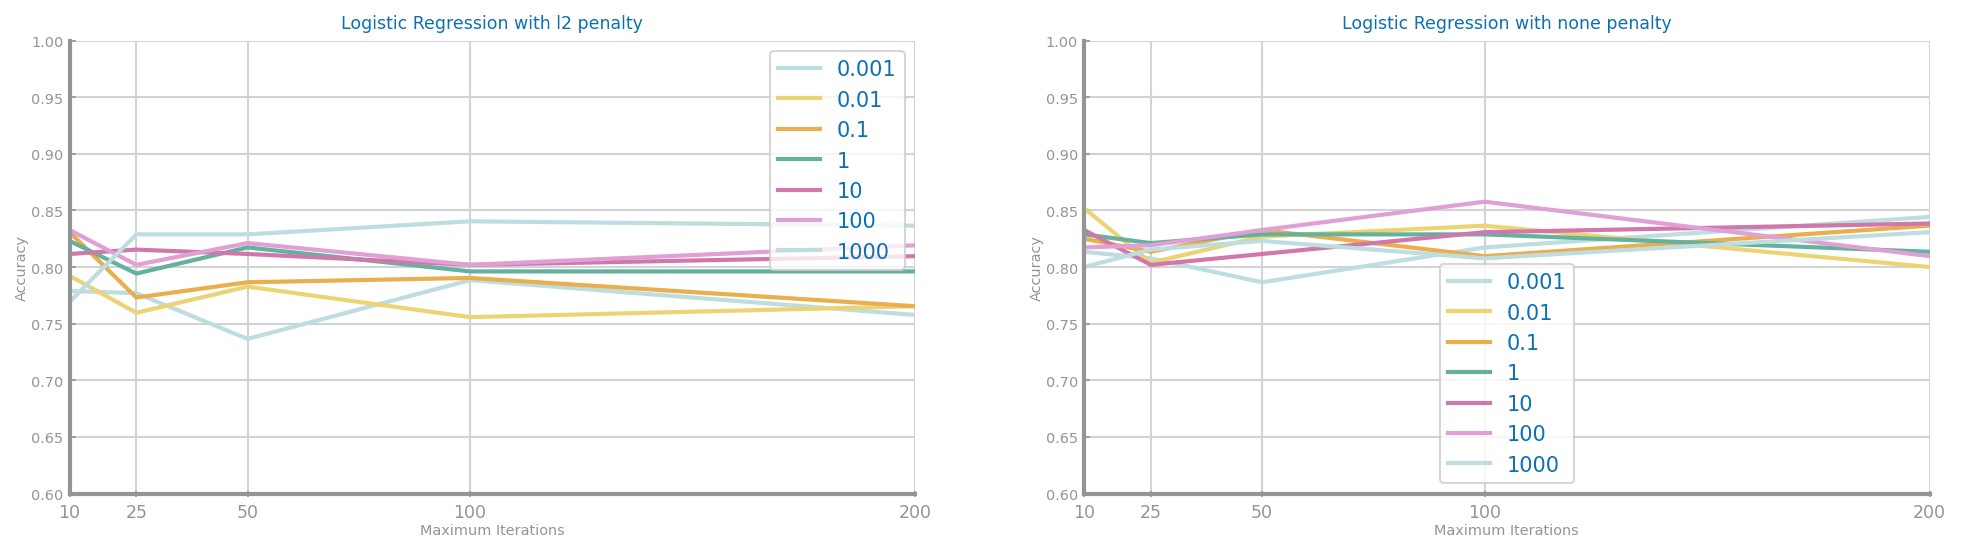

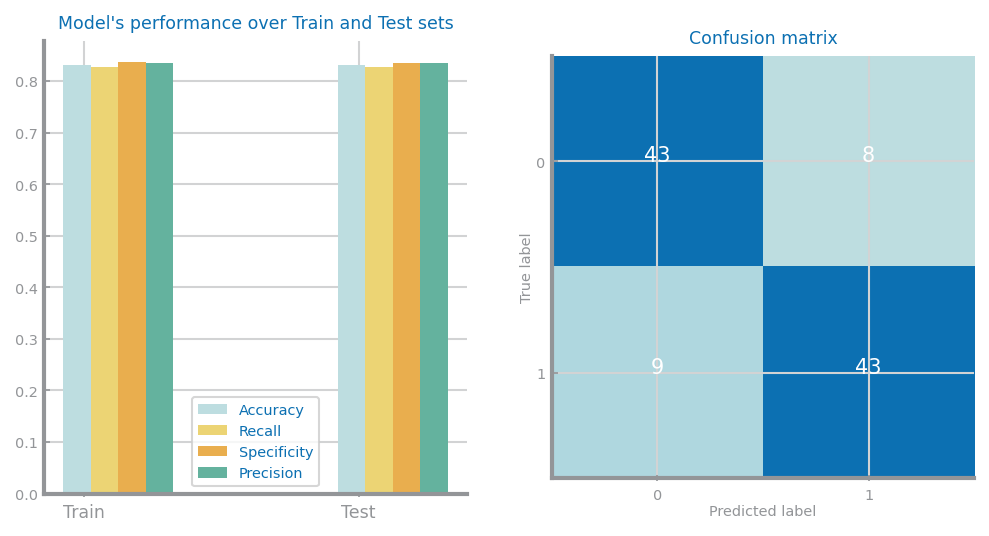








 HR_S_FRFE_extra_outlierTrim_IQS_B
	Model Statistics
    Accuracy  0.84  0.86
      Recall  0.84  0.88
 Specificity  0.83  0.84
   Precision  0.83  0.85


<Figure size 600x450 with 0 Axes>

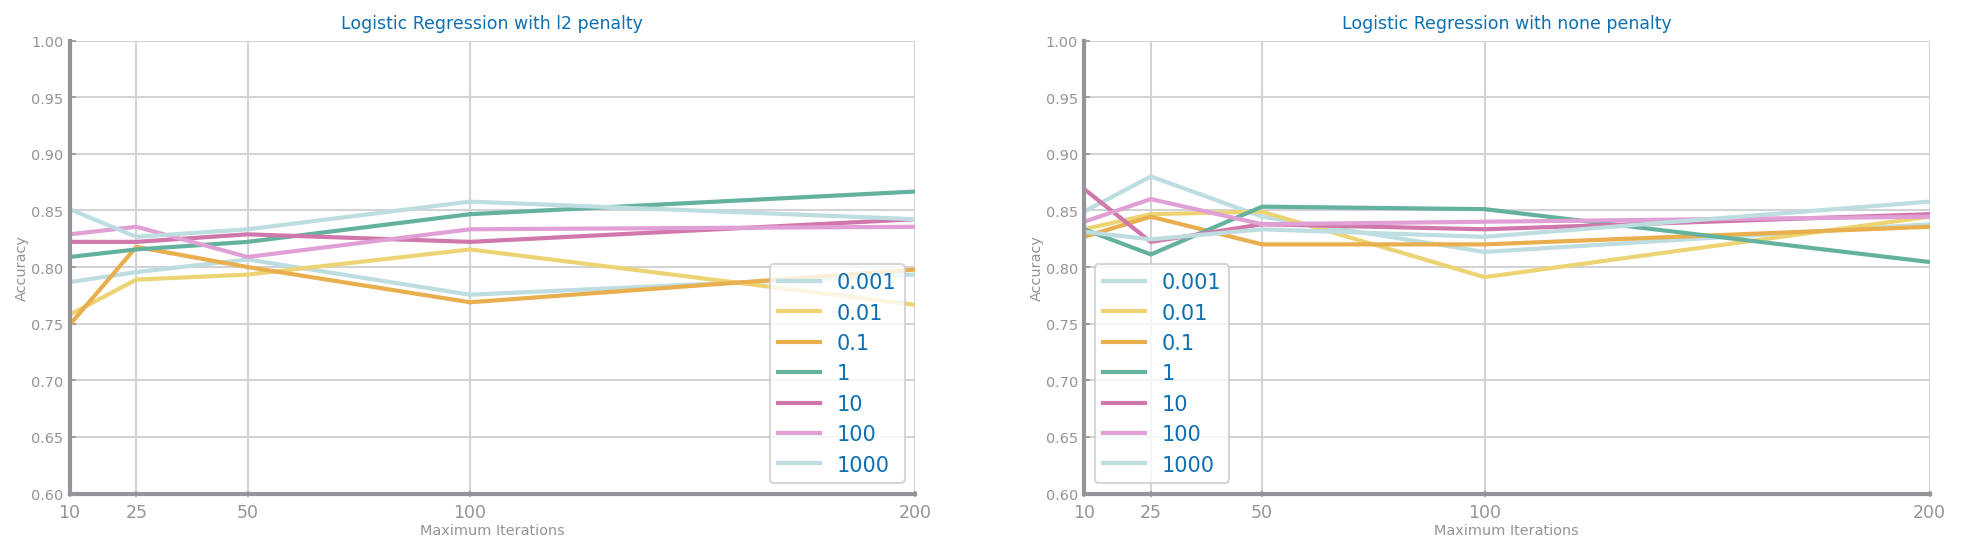

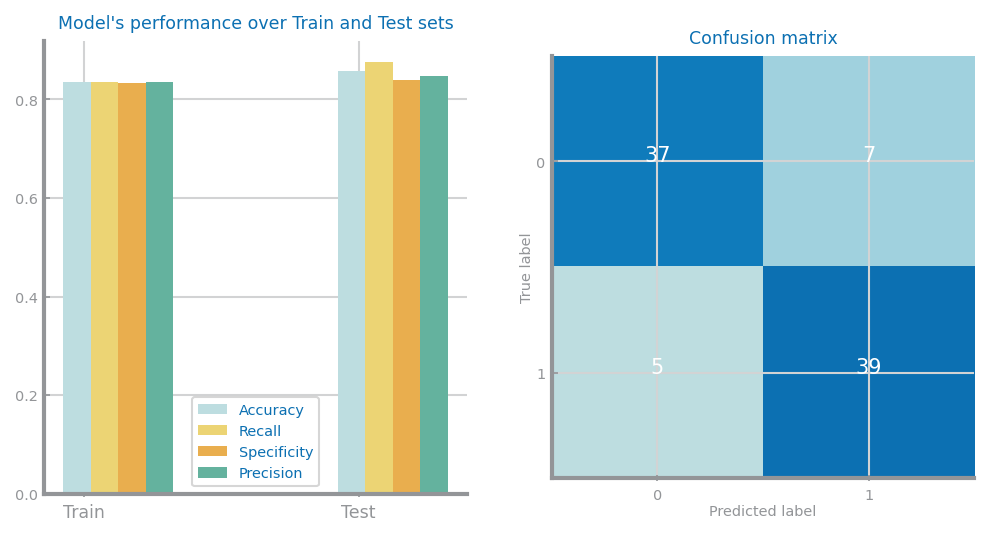








 HR_S_FRFE_outlierTrim_IQS_B
	Model Statistics
    Accuracy  0.84  0.82
      Recall  0.85  0.84
 Specificity  0.83  0.80
   Precision  0.83  0.81


<Figure size 600x450 with 0 Axes>

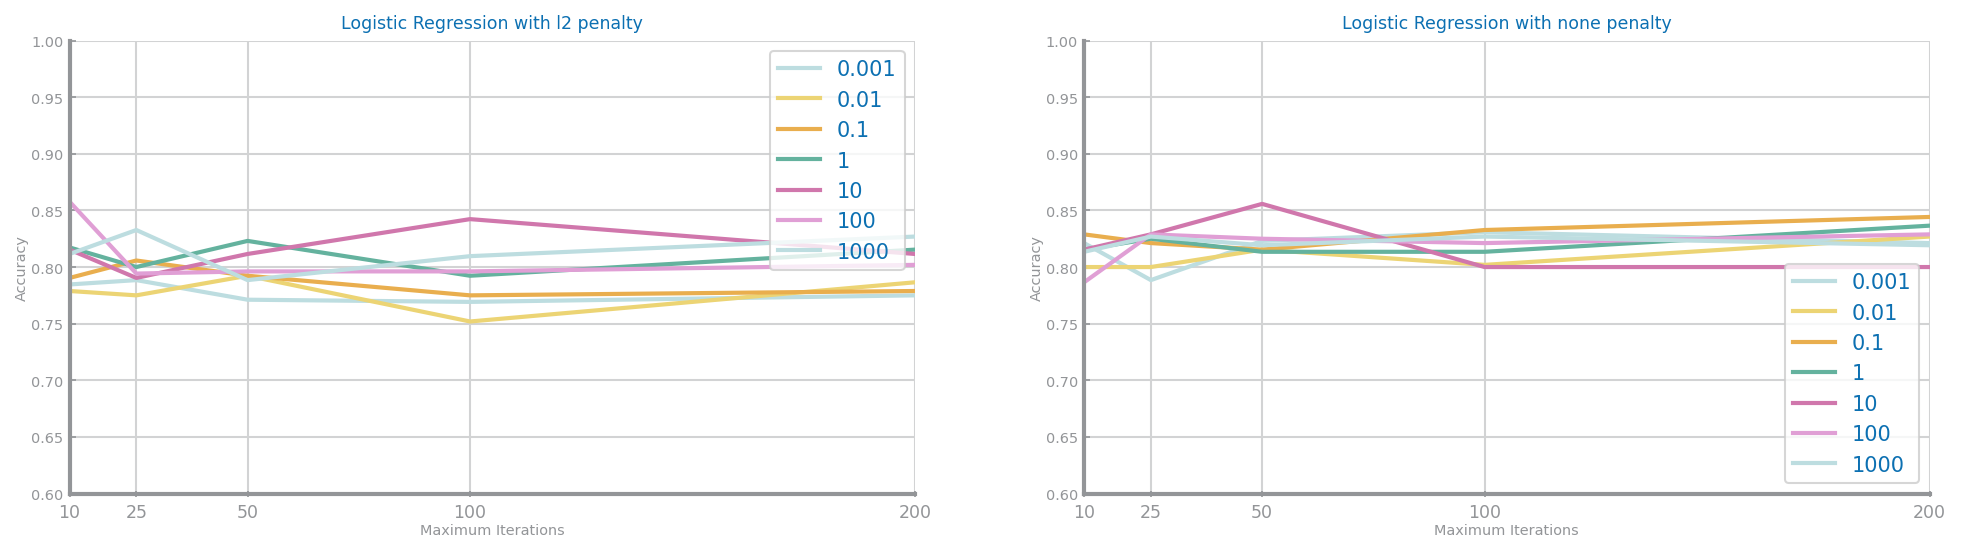

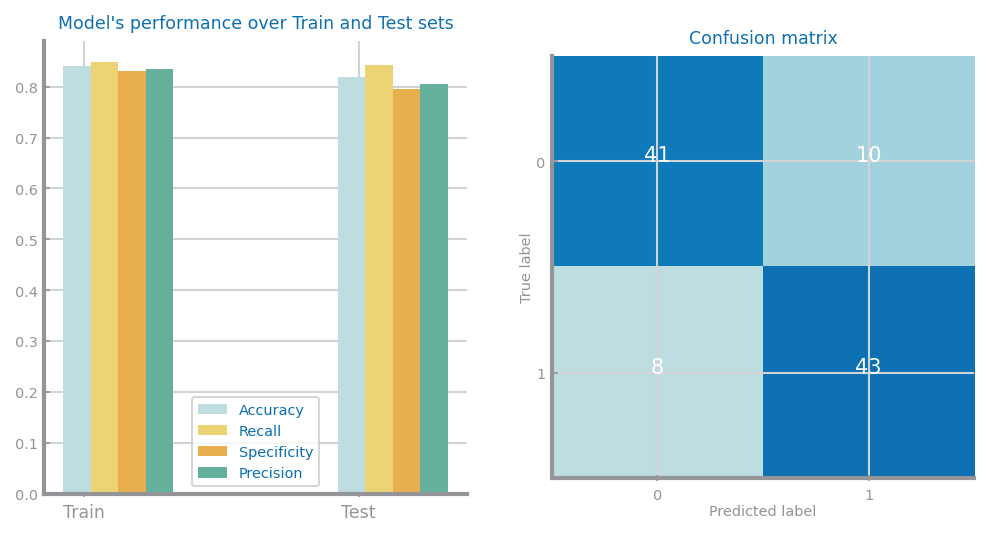

In [5]:
import os

directory = '../../datasets/TO_TEST/HF'

overall_accs = []
datasets = []
    
for filename in os.listdir(directory):
    if filename.endswith(".csv"): 
        path = directory + '/' + filename
        print('\n', filename.split('.')[0])
        data: pd.DataFrame = pd.read_csv(path)
        y: np.ndarray = data.pop('DEATH_EVENT').values
        X: np.ndarray = data.values
        labels = pd.unique(y)
        labels = pd.unique(y)
        if(labels[0] == 1):
            temp = labels[0]
            labels[0] = labels[1]
            labels[1] = temp
            
        # Perform LogReg analysis and display results
        model, evaluation, cnf_mtx = log_reg_analysis(X, y, n_holdouts=5)  
        
        fig, axs = plt.subplots(1, 2, figsize=(2 * ds.HEIGHT, ds.HEIGHT))
        ds.multiple_bar_chart(['Train', 'Test'], evaluation, ax=axs[0], title="Model's performance over Train and Test sets")
        ds.plot_confusion_matrix(cnf_mtx, labels, ax=axs[1])

        pretty_metrics(evaluation)
        
        plt.show()
        
        # Record the accuracy achieved
        overall_accs += [evaluation['Accuracy'][1]]
        
        # Dataset name
        datasets += [filename.split('.')[0]]

        
        print('\n\n\n\n\n')

0     0.857778
1     0.853333
2     0.853061
3     0.851111
4     0.846939
5     0.835556
6     0.833333
7     0.831111
8     0.830769
9     0.830588
10    0.830588
11    0.828889
12    0.826667
13    0.825882
14    0.822222
15    0.820000
16    0.820000
17    0.819231
18    0.817778
19    0.817778
20    0.802041
21    0.740984
dtype: float64


[Text(0, 0, 'HR_S_FRFE_outlierTrim_IQS_B'),
 Text(0, 0, 'HR_standardized_extra_rfe'),
 Text(0, 0, 'HR_S_FMixed_outlierTrim_IQS_B'),
 Text(0, 0, 'HR_S_FMixed_extra_outlierTrim_IQS_B'),
 Text(0, 0, 'HR_standardized_extra_lasso'),
 Text(0, 0, 'HR_standardized_corr'),
 Text(0, 0, 'HF_S_FAnova_outlierTrim_IQS_B'),
 Text(0, 0, 'HR_S_FImp_extra_outlierTrim_IQS_B'),
 Text(0, 0, 'HR_standardized_extraTreeClassifier'),
 Text(0, 0, 'HR_S_FCorr_extra_outlierTrim_IQS_B'),
 Text(0, 0, 'HF_S_FAnova_extra_outlierTrim_IQS_B'),
 Text(0, 0, 'HR_standardized_rfe'),
 Text(0, 0, 'HR_S_FCorr_outlierTrim_IQS_B'),
 Text(0, 0, 'HR_standardized_lasso'),
 Text(0, 0, 'HR_standardized_extra_mixed'),
 Text(0, 0, 'HR_standardized_extra'),
 Text(0, 0, 'HR_standardized_extra_anova'),
 Text(0, 0, 'HR_S_FRFE_extra_outlierTrim_IQS_B'),
 Text(0, 0, 'HR_standardized_anova'),
 Text(0, 0, 'HR_standardized_mixed'),
 Text(0, 0, 'HF_balanced'),
 Text(0, 0, 'HR_S_FImp_outlierTrim_IQS_B')]

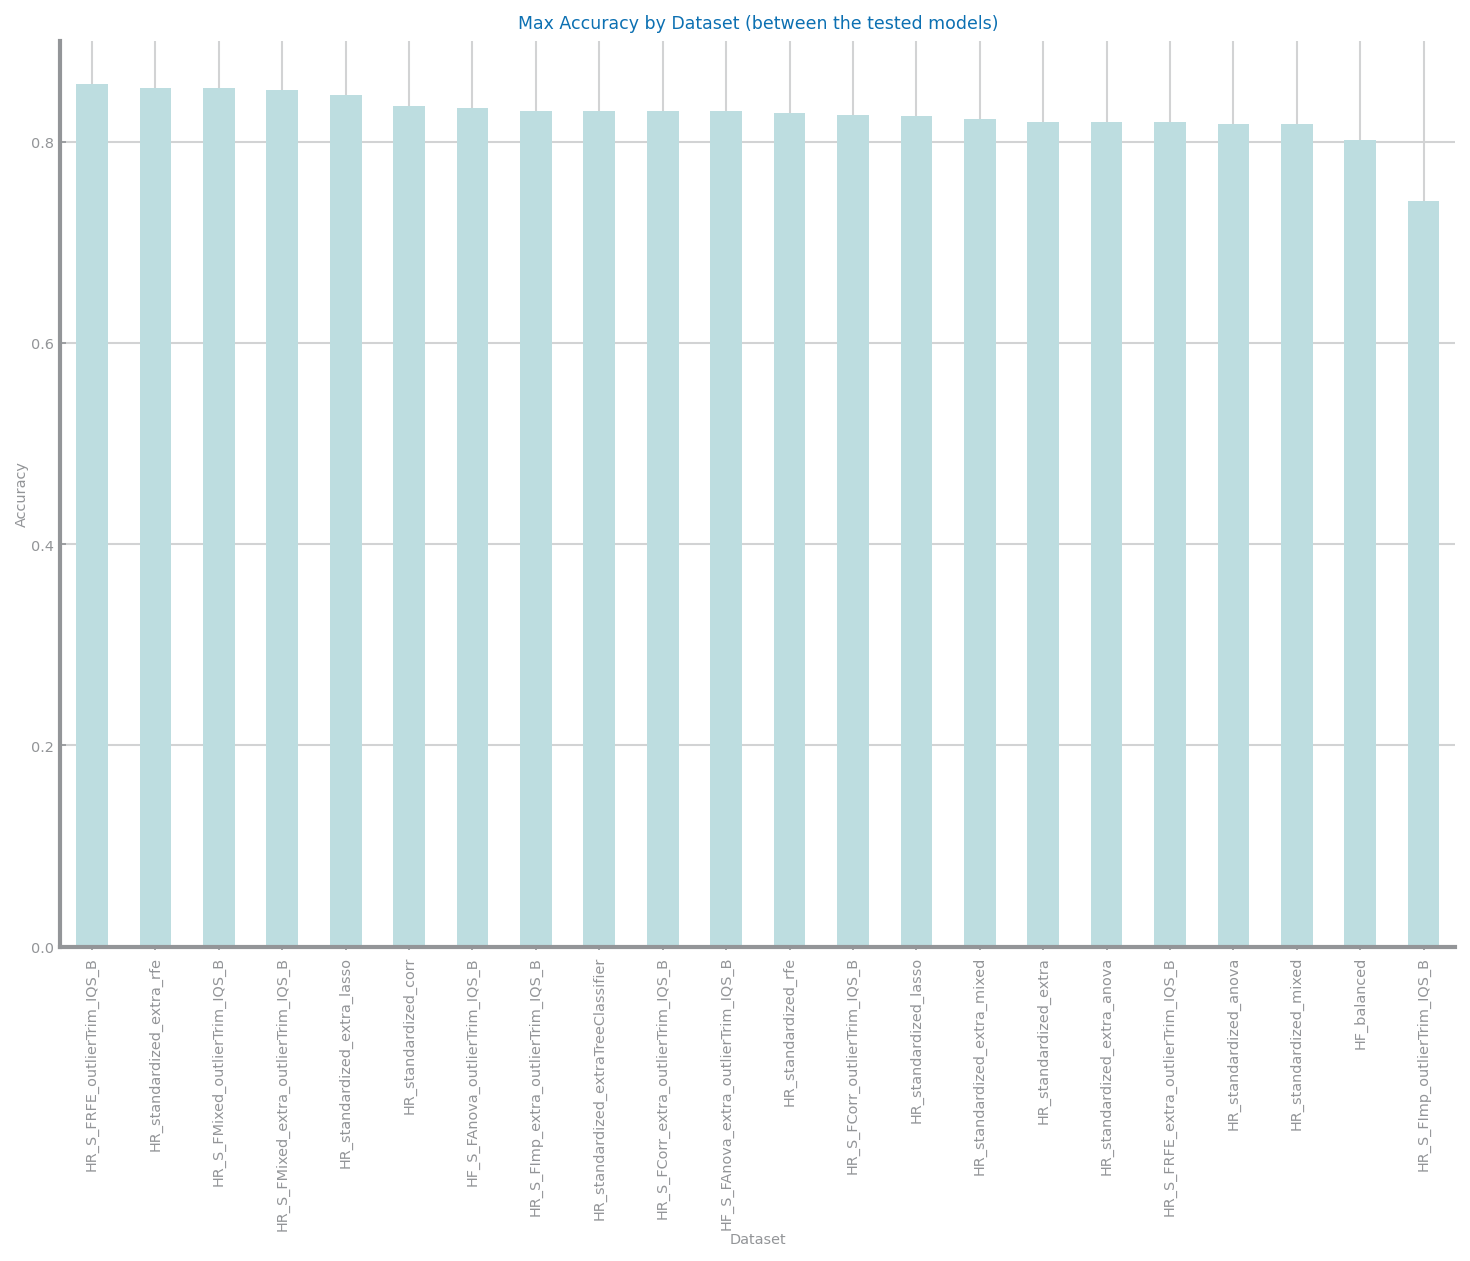

In [8]:
accs = pd.Series(overall_accs)
datasets = list(datasets)

res = {datasets[i]: overall_accs[i] for i in range(len(datasets))}

res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}

accs = pd.Series(list(res.values()))

print(accs)

datasets = list(res.keys())
# Plot the figure.
plt.figure(figsize=(12, 8))
ax = accs.plot(kind='bar')
ax.set_title('Max Accuracy by Dataset (between the tested models)')
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_xticklabels(datasets)